# Análisis del Empleo y la Informalidad en Ecuador (ENEMDU 2024)

Este proyecto realiza un análisis exploratorio y multivariado del mercado laboral ecuatoriano utilizando los datos de la **Encuesta Nacional de Empleo, Desempleo y Subempleo (ENEMDU 2024)**.  
El objetivo principal es comprender la situación del empleo, desempleo e informalidad, así como las brechas existentes por **edad, género, educación y área geográfica**.

# **1.- CARGA DE DATOS**
En esta primera etapa vamos a:

Importar las librerías necesarias:

1. **pandas**: Para manipulación de datos (DataFrames)
2. **numpy**: Para operaciones numéricas
3. **matplotlib** y seaborn: Para visualizaciones
4. *warnings*: Para suprimir advertencias molestas


Cargar el dataset:

Leeremos el archivo csv. Realizaremos una primera inspección para entender su estructura


Exploración inicial:

1. Ver las primeras filas con .head()
2. Conocer las dimensiones con .shape
3. Revisar tipos de datos con .info()
4. Obtener estadísticas descriptivas con .describe()
5. Verificar nombres de columnas

In [5]:
# ============================================
# 1. IMPORTACIÓN DE LIBRERÍAS
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuraciones generales
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.max_rows', 100)      # Mostrar hasta 100 filas
plt.style.use('seaborn-v0_8-darkgrid')      # Estilo de gráficos
sns.set_palette("husl")                      # Paleta de colores

In [6]:
# ============================================
# 2. CARGA DEL DATASET
# ============================================

df = pd.read_csv('/content/BDDenemdu_personas_2024_anual.csv',sep=";", encoding='utf-8', na_values=[" "], low_memory=False)

print(f" Dataset cargado exitosamente")
print(f" Dimensiones: {df.shape[0]:,} filas x {df.shape[1]} columnas")

 Dataset cargado exitosamente
 Dimensiones: 41,439 filas x 139 columnas


In [7]:
# ============================================
# 3. EXPLORACIÓN INICIAL
# ============================================

print("\n" + "="*60)
print("PRIMERAS 5 FILAS DEL DATASET")
print("="*60)
display(df.head())

print("\n" + "="*60)
print("INFORMACIÓN GENERAL DEL DATASET")
print("="*60)
print(df.info())

print("\n" + "="*60)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("="*60)
display(df.describe())

print("\n" + "="*60)
print("COLUMNAS DISPONIBLES")
print("="*60)
print(f"Total de columnas: {len(df.columns)}")
print("\nNombres de columnas:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:3d}. {col}")


PRIMERAS 5 FILAS DEL DATASET


,area,ciudad,conglomerado,panelm,vivienda,hogar,p01,p02,p03,p04,p05a,p05b,p06,p07,p08,p09,p10a,p10b,p11,p12a,p12b,p15,p15aa,p15ab,cod_inf,p20,p21,p22,p23,p24,p25,p26,p27,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37,p38,p39,p40,p41,p42,p42a,p43,p44a,p44b,p44c,p44d,p44e,p44f,p44g,p44h,p44i,p44j,p44k,p45,p46,p47a,p47b,p48,p49,p50,p51a,p51b,p51c,p52,p53,p54,p54a,p55,p56a,p56b,p57,p58,p61b1,p63,p64a,p64b,p65,p66,p67,p68a,p68b,p69,p70a,p70b,p71a,p71b,p72a,p72b,p73a,p73b,p74a,p74b,p75,p76,p77,p78,sd01,sd021,sd022,sd023,sd024,sd025,sd026,sd027,sd028,sd029,sd0210,sd0211,sd03,ced01a,estrato,fexp,nnivins,ingrl,ingpc,condact,empleo,desempleo,secemp,grupo1,rama1,prov,dominio,pobreza,epobreza,upm,id_vivienda,id_hogar,id_persona,periodo,mes
0,1,10150,304,42,1,1,1,1,31,1,1,10,5.0,2.0,NaN,5.0,6.0,6.0,NaN,NaN,NaN,6.0,1,NaN,2.0,1.0,NaN,NaN,NaN,40.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8413.0,5412.0,1.0,NaN,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,9.0,1.0,2.0,NaN,NaN,NaN,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,900.0,100.0,1.0,10.0,NaN,NaN,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2712,"154,513226743264",4.0,1010.0,"503,75",1,1.0,NaN,1.0,5.0,15.0,1,3,0.0,0.0,10150000304,101500003040420103,1015000030404201103,0101500003040420110103,202403.0,3.0
1,1,10150,304,42,1,1,2,2,39,2,1,10,5.0,2.0,NaN,2.0,10.0,2.0,NaN,1.0,40110107.0,6.0,2,70150.0,2.0,1.0,NaN,NaN,NaN,40.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8521.0,2342.0,1.0,NaN,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,10.0,1.0,2.0,NaN,NaN,NaN,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,900.0,100.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2712,"154,513226743264",5.0,1000.0,"503,75",1,1.0,NaN,1.0,2.0,16.0,1,3,0.0,0.0,10150000304,101500003040420103,1015000030404201103,0101500003040420110203,202403.0,3.0
2,1,10150,304,42,1,1,3,1,7,7,1,10,NaN,1.0,1.0,NaN,5.0,2.0,1.0,NaN,NaN,6.0,1,NaN,2.0,2.0,12.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,12.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,1.0,5.0,2.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2712,"154,513226743264",3.0,NaN,"503,75",0,NaN,NaN,NaN,NaN,NaN,1,3,0.0,0.0,10150000304,101500003040420103,1015000030404201103,0101500003040420110303,202403.0,3.0
3,1,10150,304,42,1,1,4,1,1,3,1,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2712,"154,513226743264",NaN,NaN,"503,75",0,NaN,NaN,NaN,NaN,NaN,1,3,0.0,0.0,10150000304,101500003040420103,1015000030404201103,0101500003040420110403,202403.0,3.0
4,1,10150,304,42,1,1,1,1,31,1,1,10,5.0,2.0,NaN,5.0,6.0,6.0,NaN,NaN,NaN,6.0,1,NaN,2.0,1.0,NaN,NaN,NaN,40.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8423.0,5412.0,1.0,NaN,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,10.0,1.0,2.0,NaN,NaN,NaN,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1000.0,100.0,1.0,21.0,NaN,NaN,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2712,"67,5497258073726",4.0,1121.0,"533,5",1,1.0,NaN,1.0,5.0,15.0,1,3,0.0,0.0,10150000304,101500003040420106,1015000030404201106,0101500003040420110106,202406.0,6.0



INFORMACIÓN GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41439 entries, 0 to 41438
Columns: 139 entries, area to mes
dtypes: float64(115), int64(21), object(3)
memory usage: 43.9+ MB
None

ESTADÍSTICAS DESCRIPTIVAS


,area,ciudad,conglomerado,panelm,vivienda,hogar,p01,p02,p03,p04,p05a,p05b,p06,p07,p08,p09,p10a,p10b,p11,p12a,p12b,p15,p15aa,p15ab,cod_inf,p20,p21,p22,p23,p24,p25,p26,p27,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37,p38,p39,p40,p41,p42,p42a,p43,p44a,p44b,p44c,p44d,p44e,p44f,p44g,p44h,p44i,p44j,p44k,p45,p46,p47a,p47b,p48,p49,p50,p51a,p51b,p51c,p52,p53,p54,p54a,p55,p56a,p56b,p57,p58,p61b1,p63,p64a,p64b,p65,p66,p67,p68a,p68b,p69,p70a,p70b,p71a,p71b,p72a,p72b,p73a,p73b,p74a,p74b,p75,p76,p77,p78,sd01,sd021,sd022,sd023,sd024,sd025,sd026,sd027,sd028,sd029,sd0210,sd0211,sd03,ced01a,estrato,nnivins,ingrl,condact,empleo,desempleo,secemp,grupo1,rama1,prov,dominio,pobreza,epobreza,upm,id_vivienda,id_hogar,periodo,mes
count,41439.000000,41439.000000,41439.000000,41439.000000,41439.000000,41439.000000,41439.000000,41439.000000,41439.000000,41439.000000,41439.000000,41439.000000,35666.000000,39524.000000,10885.000000,28639.00000,39524.000000,38525.000000,15991.000000,11346.000000,7.611000e+03,39524.000000,41439.000000,13032.000000,39524.000000,39524.000000,19975.000000,19410.000000,336.000000,20450.000000,8522.000000,11928.000000,19510.000000,3714.000000,3563.000000,3563.000000,1914.000000,19074.000000,799.000000,18275.000000,114.000000,18196.000000,878.000000,619.000000,619.000000,21068.000000,21068.000000,21069.000000,7972.000000,10417.000000,10417.000000,10417.000000,10417.000000,10417.000000,10417.00000,10417.000000,10417.000000,10417.000000,10417.000000,10417.000000,10417.000000,20450.000000,20450.000000,20450.000000,16481.000000,16014.000000,16014.000000,20450.000000,20450.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,860.000000,1407.000000,1407.000000,1378.000000,1360.000000,1360.000000,33741.000000,7972.000000,7972.000000,3323.000000,7972.000000,10417.000000,10417.000000,10417.000000,4542.000000,1106.000000,1106.000000,376.000000,39524.000000,1011.000000,39524.000000,4630.000000,39524.000000,9391.000000,39524.000000,1068.000000,39524.000000,1248.000000,39524.000000,70.0,878.0,878.000000,878.000000,878.000000,878.000000,878.000000,878.0,878.0,878.0,878.0,878.0,878.0,878.000000,41439.000000,41439.000000,39524.000000,18466.000000,41439.000000,20344.0,878.0,20344.000000,20344.000000,20344.000000,41439.000000,41439.000000,41321.000000,41321.000000,4.143900e+04,4.143900e+04,4.143900e+04,41438.000000,41438.000000
mean,1.217187,14329.359661,189525.794517,46.919520,4.362871,1.005550,2.512271,1.532494,37.911171,2.667849,6.211395,9.930187,3.764958,1.724598,1.861093,4.51168,6.285447,4.446775,1.146020,1.329191,3.330866e+07,5.799540,1.343807,53413.650399,1.566592,1.505389,11.855219,1.982689,2.666667,35.448851,3.620981,1.054074,3.581804,1.040657,17.273646,4.243896,3.640543,10.810318,11.459324,10.136799,1.307018,3.117443,1.294989,4.408724,17.903069,4636.740744,5800.283083,4.212635,1.998620,2.644715,1.802534,1.987040,1.975905,1.384276,1.74388,1.383220,1.988768,1.999232,1.884708,1.391667,1.391763,13.749095,4.839804,1.194083,4.993144,2.551268,1.499813,1.068802,35.990220,12.764037,0.270789,3503.450604,6282.820896,5.706468,1.995349,7.835110,1.020611,2.346154,2.790441,1.700000,3.987849,1281.814601,1.583166,59.851941,867.591445,1118.418547,546.203705,1.563982,43.510568,250.944846,1.660036,46.367021,1.974421,465.429278,1.882856,1476.323110,1.762398,95.651262,1.972978,264.013109,1.968424,69.457532,1.998229,240.0,2.0,1.809795,1.453303,1.099089,1.157175,1.993166,2.0,2.0,2.0,2.0,2.0,2.0,4.735763,1.049663,1640.134414,3.797768,1048.818369,3.974710,1.0,1.0,1.447355,5.550433,8.081105,1.407635,4.286324,0.084073,0.023910,1.432955e+10,1.432955e+17,1.432955e+18,202406.468242,6.468242
std,0.412336,7147.341138,338311.740896,7.876666,2.293051,0.096355,1.559226,0.498949,23.312095,1.746787,4.305019,0.589928,2.229498,0.446722,1.548315,3.85509,2.108880,2.106105,0.353137,0.469940,9.497177e+06,1.011944,0.533107,53918.081994,0.941442,0.499977,0.930532,0.130430,2.208982,13.396756,3.240285,0.409508,0.922018,0.197521,8.545617,2.732150,0.947303,1.118936,11.339179,1.59


COLUMNAS DISPONIBLES
Total de columnas: 139

Nombres de columnas:
  1. area
  2. ciudad
  3. conglomerado
  4. panelm
  5. vivienda
  6. hogar
  7. p01
  8. p02
  9. p03
 10. p04
 11. p05a
 12. p05b
 13. p06
 14. p07
 15. p08
 16. p09
 17. p10a
 18. p10b
 19. p11
 20. p12a
 21. p12b
 22. p15
 23. p15aa
 24. p15ab
 25. cod_inf
 26. p20
 27. p21
 28. p22
 29. p23
 30. p24
 31. p25
 32. p26
 33. p27
 34. p28
 35. p29
 36. p30
 37. p31
 38. p32
 39. p33
 40. p34
 41. p35
 42. p36
 43. p37
 44. p38
 45. p39
 46. p40
 47. p41
 48. p42
 49. p42a
 50. p43
 51. p44a
 52. p44b
 53. p44c
 54. p44d
 55. p44e
 56. p44f
 57. p44g
 58. p44h
 59. p44i
 60. p44j
 61. p44k
 62. p45
 63. p46
 64. p47a
 65. p47b
 66. p48
 67. p49
 68. p50
 69. p51a
 70. p51b
 71. p51c
 72. p52
 73. p53
 74. p54
 75. p54a
 76. p55
 77. p56a
 78. p56b
 79. p57
 80. p58
 81. p61b1
 82. p63
 83. p64a
 84. p64b
 85. p65
 86. p66
 87. p67
 88. p68a
 89. p68b
 90. p69
 91. p70a
 92. p70b
 93. p71a
 94. p71b
 95. p72a
 96. p72b


In [8]:
# ============================================
# 4. VERIFICACIÓN DE DUPLICADOS INICIALES
# ============================================

print("\n" + "="*60)
print("ANÁLISIS DE DUPLICADOS")
print("="*60)

# Duplicados totales (todas las columnas)
duplicados_totales = df.duplicated().sum()
print(f"Duplicados completos: {duplicados_totales:,}")

# Duplicados por ID de persona
if 'id_persona' in df.columns:
    duplicados_persona = df.duplicated(subset=['id_persona']).sum()
    print(f"Duplicados por id_persona: {duplicados_persona:,}")

    # Ver algunos ejemplos de duplicados
    if duplicados_persona > 0:
        print("\n📋 Ejemplo de personas duplicadas:")
        ejemplo_dup = df[df.duplicated(subset=['id_persona'], keep=False)].sort_values('id_persona')
        display(ejemplo_dup[['id_persona', 'p01', 'p02', 'p03', 'hogar', 'vivienda']].head(10))


ANÁLISIS DE DUPLICADOS
Duplicados completos: 0
Duplicados por id_persona: 0


In [9]:
# ============================================
# 5. ANÁLISIS DE VALORES FALTANTES
# ============================================

print("\n" + "="*60)
print("ANÁLISIS DE VALORES FALTANTES")
print("="*60)

# Calcular porcentaje de valores faltantes
missing = pd.DataFrame({
    'Columna': df.columns,
    'Valores_Faltantes': df.isnull().sum(),
    'Porcentaje': (df.isnull().sum() / len(df) * 100).round(2)
})

# Filtrar solo columnas con valores faltantes
missing = missing[missing['Valores_Faltantes'] > 0].sort_values('Porcentaje', ascending=False)

print(f"\nColumnas con valores faltantes: {len(missing)}/{len(df.columns)}")
print("\nTop 20 columnas con más valores faltantes:")
display(missing.head(20))


ANÁLISIS DE VALORES FALTANTES

Columnas con valores faltantes: 116/139

Top 20 columnas con más valores faltantes:


,Columna,Valores_Faltantes,Porcentaje
p78,p78,41369,99.83
p35,p35,41325,99.72
p23,p23,41103,99.19
p70b,p70b,41063,99.09
p39,p39,40820,98.51
p38,p38,40820,98.51
p33,p33,40640,98.07
p54a,p54a,40579,97.92
sd024,sd024,40561,97.88
p37,p37,40561,97.88


## 2. SELECCIÓN DE VARIABLES Y LIMPIEZA DE DATOS
En este paso vamos a:

Seleccionar las variables relevantes para nuestro análisis de desempleo y subempleo juvenil. De las 139 columnas, solo necesitamos aproximadamente 30-35 que realmente aporten valor a nuestro estudio.
Entender qué significa cada variable seleccionada:

VARIABLES DEMOGRÁFICAS:

2. p02: Sexo (1=Hombre, 2=Mujer)
3. p03: Edad en años cumplidos
5. p15: Autoidentificación étnica (1=Indígena, 2=Afroecuatoriano, 3=Negro 4=Mulato, 5=Montubio, 6=Mestizo, 7=Blanco, 8=Otro)


VARIABLES DE EDUCACIÓN:
2. p10a: Nivel de instrucción (1=Ninguno, 2=Centro alfabetización, 3=Preescolar, 4=Primaria, 5=Educación básica, 6=Secundaria, 7=Educación media, 8=Superior no universitaria, 9=Superior universitaria, 10=Postgrado)
5. nnivins: Nivel de instrucción codificado (variable procesada)

VARIABLES DE SITUACIÓN LABORAL:

3. p24: Horas de trabajo en la semana anterior
4. p27: ¿Desea trabajar más horas? (1=Sí, 2=No) - INDICADOR DE SUBEMPLEO
7. condact: Condición de actividad (1=PEA ocupada, 2=PEA desocupada, 3=PEI)
8. empleo: Población con empleo (1=Tiene empleo, 0=No tiene)
9. desempleo: Población con desempleo (1=Desempleado, 0=No desempleado)

VARIABLES DE CALIDAD DEL EMPLEO:

1. p42: Categoría de ocupación (1=Empleado gobierno, 2=Empleado privado, 3=Empleado tercerización, 4=Jornalero, 5=Patrono, 6=Cuenta propia, 7=Trabajador familiar sin pago, 8=Trabajador del hogar no remunerado, 9=Empleado doméstico, 10=Ayudante no remunerado de asalariado/jornalero)
3. p44f: ¿Recibe seguro social? (1=Sí, 2=No) - INDICADOR DE FORMALIDAD
7. secemp: Sector de empleo (1=Formal, 2=Informal, 3=Empleado doméstico, 4=No clasificado)

VARIABLES DE INGRESOS:

1. ingrl: Ingreso laboral mensual
2. p66: Ingreso de asalariados


Crear un nuevo DataFrame solo con estas variables relevantes para trabajar de forma más eficiente.
Realizar limpieza básica:

Filtrar solo personas en edad de trabajar (≥15 años)
Verificar la coherencia de los datos

In [10]:
print("="*60)
print("SELECCIÓN ESTRATÉGICA DE VARIABLES CLAVE")
print("="*60)

# SOLO las variables absolutamente necesarias
columnas_esenciales = [
    # Identificadores y contexto
    'id_persona', 'periodo', 'area', 'prov', 'fexp',

    # Demográficas (5)
    'p02',  # sexo
    'p03',  # edad
    'p15',  # etnia

    # Educación (2)
    'p10a',     # nivel_instruccion
    'nnivins',  # nivel_instruccion codificado

    # Situación Laboral CORE (5)
    'condact',   # condición de actividad (MASTER)
    'empleo',    # tiene empleo
    'desempleo', # está desempleado
    'p24',       # horas trabajadas
    'p27',       # desea trabajar más (subempleo)

    # Calidad del Empleo (3)
    'p42',   # categoría ocupación
    'p44f',  # recibe seguro social
    'secemp', # sector empleo (formal/informal)

    # Ingresos (2)
    'ingrl',  # ingreso laboral
    'p66',    # ingreso asalariados
]

# Verificar disponibilidad
columnas_disponibles = [col for col in columnas_esenciales if col in df.columns]
print(f" Variables seleccionadas: {len(columnas_disponibles)}")

# Crear dataset reducido
df_clean = df[columnas_disponibles].copy()
print(f" Dataset inicial: {df_clean.shape[0]:,} filas x {df_clean.shape[1]} columnas")

SELECCIÓN ESTRATÉGICA DE VARIABLES CLAVE
 Variables seleccionadas: 20
 Dataset inicial: 41,439 filas x 20 columnas


In [11]:
# ============================================
# 2. FILTRAR EDAD (PET ≥ 15 años)
# ============================================

print("\n" + "="*60)
print("FILTRO: POBLACIÓN EN EDAD DE TRABAJAR")
print("="*60)

antes = len(df_clean)
df_clean = df_clean[df_clean['p03'] >= 15].copy()
despues = len(df_clean)

print(f"Antes: {antes:,} registros")
print(f"Después: {despues:,} registros")
print(f"Eliminados: {antes - despues:,} (menores de 15 años)")


FILTRO: POBLACIÓN EN EDAD DE TRABAJAR
Antes: 41,439 registros
Después: 33,741 registros
Eliminados: 7,698 (menores de 15 años)


In [12]:
# ============================================
# 3. LIMPIEZA: EMPLEO Y DESEMPLEO
# ============================================

print("\n" + "="*60)
print("LIMPIEZA CRÍTICA: EMPLEO Y DESEMPLEO")
print("="*60)

# Analizar situación actual
print(" Situación ANTES de limpieza:")
print(f"   • empleo NaN: {df_clean['empleo'].isna().sum():,}")
print(f"   • desempleo NaN: {df_clean['desempleo'].isna().sum():,}")
print(f"   • Ambos NaN: {(df_clean['empleo'].isna() & df_clean['desempleo'].isna()).sum():,}")

# PASO 1: Eliminar registros donde AMBOS son NaN
antes_limpieza = len(df_clean)
df_clean = df_clean[~(df_clean['empleo'].isna() & df_clean['desempleo'].isna())].copy()
eliminados = antes_limpieza - len(df_clean)

print(f"\n🗑️  Registros eliminados (ambos NaN): {eliminados:,}")

# PASO 2: Aplicar lógica de coherencia
# Si empleo = 1, entonces desempleo = 0
df_clean.loc[df_clean['empleo'] == 1, 'desempleo'] = 0

# Si desempleo = 1, entonces empleo = 0
df_clean.loc[df_clean['desempleo'] == 1, 'empleo'] = 0

# Si empleo = 0 y desempleo es NaN, entonces desempleo = 1 (está desempleado)
df_clean.loc[(df_clean['empleo'] == 0) & (df_clean['desempleo'].isna()), 'desempleo'] = 1

# Si desempleo = 0 y empleo es NaN, entonces empleo = 1 (está empleado)
df_clean.loc[(df_clean['desempleo'] == 0) & (df_clean['empleo'].isna()), 'empleo'] = 1

# PASO 3: Usar condact como respaldo para casos restantes
if 'condact' in df_clean.columns:
    # condact: 1=Ocupado, 2=Desocupado, 3=Inactivo
    df_clean.loc[(df_clean['condact'] == 1) & (df_clean['empleo'].isna()), 'empleo'] = 1
    df_clean.loc[(df_clean['condact'] == 1) & (df_clean['desempleo'].isna()), 'desempleo'] = 0

    df_clean.loc[(df_clean['condact'] == 2) & (df_clean['desempleo'].isna()), 'desempleo'] = 1
    df_clean.loc[(df_clean['condact'] == 2) & (df_clean['empleo'].isna()), 'empleo'] = 0

print("\n Situación DESPUÉS de limpieza:")
print(f"   • empleo NaN: {df_clean['empleo'].isna().sum():,}")
print(f"   • desempleo NaN: {df_clean['desempleo'].isna().sum():,}")
print(f"   • Total registros: {len(df_clean):,}")

# Verificación de coherencia
incoherentes = ((df_clean['empleo'] == 1) & (df_clean['desempleo'] == 1)).sum()
print(f"\n Verificación: Registros incoherentes (empleo=1 Y desempleo=1): {incoherentes}")


LIMPIEZA CRÍTICA: EMPLEO Y DESEMPLEO
 Situación ANTES de limpieza:
   • empleo NaN: 13,397
   • desempleo NaN: 32,863
   • Ambos NaN: 12,519

🗑️  Registros eliminados (ambos NaN): 12,519

 Situación DESPUÉS de limpieza:
   • empleo NaN: 0
   • desempleo NaN: 0
   • Total registros: 21,222

 Verificación: Registros incoherentes (empleo=1 Y desempleo=1): 0


In [13]:
# ============================================
# 4. RENOMBRAR Y CREAR VARIABLES DERIVADAS
# ============================================

print("\n" + "="*60)
print("CREACIÓN DE VARIABLES DERIVADAS")
print("="*60)

# Renombrar columnas principales
df_clean.rename(columns={
    'p02': 'sexo',
    'p03': 'edad',
    'p15': 'etnia',
    'p10a': 'nivel_educativo',
    'p24': 'horas_trabajadas',
    'p27': 'desea_mas_horas',
    'p42': 'categoria_ocupacion',
    'p44f': 'tiene_seguro_social',
    'p66': 'ingreso_asalariado',
    'ingrl': 'ingreso_laboral',
    'condact': 'condicion_actividad',
    'fexp': 'factor_expansion'
}, inplace=True)

# 1. GRUPO ETARIO
df_clean['grupo_etario'] = pd.cut(df_clean['edad'],
                                    bins=[15, 29, 54, 100],
                                    labels=['Joven (15-29)', 'Adulto (30-54)', 'Mayor (55+)'])

# 2. SEXO TEXTO
df_clean['sexo_texto'] = df_clean['sexo'].map({1: 'Hombre', 2: 'Mujer'})

# 3. NIVEL EDUCATIVO AGRUPADO
df_clean['educacion_grupo'] = df_clean['nivel_educativo'].map({
    1: 'Bajo',      # Ninguno
    2: 'Bajo',      # Alfabetización
    3: 'Bajo',      # Preescolar
    4: 'Bajo',      # Primaria
    5: 'Medio',     # Educación básica
    6: 'Medio',     # Secundaria
    7: 'Medio',     # Educación media
    8: 'Alto',      # Superior no universitaria
    9: 'Alto',      # Superior universitaria
    10: 'Alto'      # Postgrado
})

# 4. SITUACIÓN LABORAL TEXTO
df_clean['situacion_laboral'] = df_clean.apply(
    lambda x: 'Empleado' if x['empleo'] == 1
    else ('Desempleado' if x['desempleo'] == 1
    else 'Inactivo'), axis=1
)

# 5. INDICADOR DE SUBEMPLEO
# Subempleado = trabaja + trabaja menos de 40h + desea trabajar más
df_clean['subempleado'] = (
    (df_clean['empleo'] == 1) &
    (df_clean['horas_trabajadas'] < 40) &
    (df_clean['desea_mas_horas'] == 1)
).astype(int)

# 6. INDICADOR DE FORMALIDAD
# Formal = tiene seguro social O secemp = 1
df_clean['empleo_formal'] = (
    (df_clean['tiene_seguro_social'] == 1) |
    (df_clean['secemp'] == 1)
).astype(int)

# Para empleados sin info, marcar como NaN
df_clean.loc[df_clean['empleo'] == 0, 'empleo_formal'] = np.nan

# 7. ÁREA TEXTO
df_clean['area_texto'] = df_clean['area'].map({1: 'Urbana', 2: 'Rural'})

print(" Variables derivadas creadas:")
print("   • grupo_etario")
print("   • sexo_texto")
print("   • educacion_grupo")
print("   • situacion_laboral")
print("   • subempleado")
print("   • empleo_formal")
print("   • area_texto")


CREACIÓN DE VARIABLES DERIVADAS
 Variables derivadas creadas:
   • grupo_etario
   • sexo_texto
   • educacion_grupo
   • situacion_laboral
   • subempleado
   • empleo_formal
   • area_texto


In [14]:
# ============================================
# 5. ANÁLISIS DE NaN EN VARIABLES CLAVE
# ============================================

print("\n" + "="*60)
print("ANÁLISIS DE VALORES FALTANTES - VARIABLES CLAVE")
print("="*60)

variables_criticas = ['edad', 'sexo', 'grupo_etario', 'educacion_grupo',
                       'empleo', 'desempleo', 'situacion_laboral']

missing_criticas = pd.DataFrame({
    'Variable': variables_criticas,
    'NaN_Count': [df_clean[col].isna().sum() for col in variables_criticas],
    'NaN_Percent': [(df_clean[col].isna().sum() / len(df_clean) * 100) for col in variables_criticas]
})

print("\n Variables demográficas y laborales básicas:")
display(missing_criticas)

# Para variables laborales (solo aplican a empleados)
variables_empleo = ['horas_trabajadas', 'categoria_ocupacion',
                    'tiene_seguro_social', 'empleo_formal', 'subempleado']

empleados = df_clean[df_clean['empleo'] == 1]
print(f"\n Variables de calidad del empleo (solo para {len(empleados):,} empleados):")
for var in variables_empleo:
    if var in df_clean.columns:
        nan_count = empleados[var].isna().sum()
        nan_pct = (nan_count / len(empleados) * 100) if len(empleados) > 0 else 0
        print(f"   • {var}: {nan_count:,} NaN ({nan_pct:.1f}%)")


ANÁLISIS DE VALORES FALTANTES - VARIABLES CLAVE

 Variables demográficas y laborales básicas:


,Variable,NaN_Count,NaN_Percent
0,edad,0,0.000000
1,sexo,0,0.000000
2,grupo_etario,47,0.221468
3,educacion_grupo,0,0.000000
4,empleo,0,0.000000
5,desempleo,0,0.000000
6,situacion_laboral,0,0.000000



 Variables de calidad del empleo (solo para 20,344 empleados):
   • horas_trabajadas: 0 NaN (0.0%)
   • categoria_ocupacion: 0 NaN (0.0%)
   • tiene_seguro_social: 9,935 NaN (48.8%)
   • empleo_formal: 0 NaN (0.0%)
   • subempleado: 0 NaN (0.0%)


In [15]:
# ============================================
# LIMPIEZA FINAL DE NaN ESTRATÉGICOS
# ============================================

print("="*60)
print("TRATAMIENTO ESTRATÉGICO DE VALORES FALTANTES")
print("="*60)

# ============================================
# 1. CORREGIR grupo_etario (749 NaN es un problema)
# ============================================

print("\n Corrigiendo grupo_etario...")
print(f"   NaN antes: {df_clean['grupo_etario'].isna().sum():,}")

# Recalcular para asegurar que todos tengan valor
df_clean['grupo_etario'] = pd.cut(
    df_clean['edad'],
    bins=[15, 29, 54, 100],
    labels=['Joven (15-29)', 'Adulto (30-54)', 'Mayor (55+)'],
    include_lowest=True
)

print(f"   NaN después: {df_clean['grupo_etario'].isna().sum():,}")

# Si aún hay NaN, eliminarlos (no deberían existir)
if df_clean['grupo_etario'].isna().sum() > 0:
    antes = len(df_clean)
    df_clean = df_clean.dropna(subset=['grupo_etario']).copy()
    print(f"   Eliminados: {antes - len(df_clean):,} registros con edad fuera de rango")

# ============================================
# 2. COMPLETAR NaN EN VARIABLES LABORALES
# ============================================

print("\n Completando variables laborales para NO empleados...")

# Para personas que NO están empleadas, llenar con valores lógicos
no_empleados = df_clean['empleo'] == 0

# horas_trabajadas → 0 para no empleados
df_clean.loc[no_empleados, 'horas_trabajadas'] = df_clean.loc[no_empleados, 'horas_trabajadas'].fillna(0)

# desea_mas_horas → 2 (No) para no empleados
df_clean.loc[no_empleados, 'desea_mas_horas'] = df_clean.loc[no_empleados, 'desea_mas_horas'].fillna(2)

# categoria_ocupacion → 99 (No aplica) para no empleados
df_clean.loc[no_empleados, 'categoria_ocupacion'] = df_clean.loc[no_empleados, 'categoria_ocupacion'].fillna(99)

# tiene_seguro_social → 2 (No) para no empleados
df_clean.loc[no_empleados, 'tiene_seguro_social'] = df_clean.loc[no_empleados, 'tiene_seguro_social'].fillna(2)

# secemp → 99 (No aplica) para no empleados
df_clean.loc[no_empleados, 'secemp'] = df_clean.loc[no_empleados, 'secemp'].fillna(99)

# empleo_formal → 0 (No formal) para no empleados
df_clean.loc[no_empleados, 'empleo_formal'] = df_clean.loc[no_empleados, 'empleo_formal'].fillna(0)

print(" Variables laborales completadas para no empleados")

# ============================================
# 3. TRATAR INGRESOS (mantener NaN es válido)
# ============================================

print("\n Tratamiento de ingresos...")

# Crear variable binaria: tiene_ingresos
df_clean['tiene_ingresos'] = df_clean['ingreso_laboral'].notna().astype(int)

# Para análisis, llenar NaN con 0 SOLO para visualizaciones
# (mantendremos la columna original con NaN intacta)
df_clean['ingreso_laboral_clean'] = df_clean['ingreso_laboral'].fillna(0)

print(f"   • Personas con ingresos laborales: {df_clean['tiene_ingresos'].sum():,}")
print(f"   • Personas sin ingresos: {(df_clean['tiene_ingresos']==0).sum():,}")

# ============================================
# 4. VERIFICACIÓN FINAL
# ============================================

print("\n" + "="*60)
print("VERIFICACIÓN FINAL DE NaN")
print("="*60)

nan_finales = df_clean.isna().sum()
nan_finales = nan_finales[nan_finales > 0].sort_values(ascending=False)

print(f"\n Variables con NaN restantes: {len(nan_finales)}/{df_clean.shape[1]}")
if len(nan_finales) > 0:
    print("\nDetalle:")
    for col, cantidad in nan_finales.items():
        pct = (cantidad / len(df_clean)) * 100
        print(f"   • {col}: {cantidad:,} ({pct:.2f}%)")
else:
    print("\n ¡No hay NaN en el dataset!")

# ============================================
# 5. CREAR DATASET PARA ANÁLISIS
# ============================================

print("\n" + "="*60)
print("DATASET FINAL OPTIMIZADO")
print("="*60)

# Seleccionar solo columnas que usaremos en el análisis
columnas_finales = [
    # Identificadores
    'id_persona', 'periodo', 'area', 'area_texto', 'prov', 'factor_expansion',

    # Demográficas
    'edad', 'sexo', 'sexo_texto', 'grupo_etario', 'etnia',

    # Educación
    'nivel_educativo', 'educacion_grupo',

    # Situación Laboral
    'condicion_actividad', 'situacion_laboral', 'empleo', 'desempleo',

    # Detalles del Empleo
    'horas_trabajadas', 'desea_mas_horas', 'categoria_ocupacion',
    'tiene_seguro_social', 'secemp', 'empleo_formal',

    # Indicadores Derivados
    'subempleado',

    # Ingresos
    'ingreso_laboral', 'ingreso_laboral_clean', 'tiene_ingresos'
]

# Verificar que existan
columnas_finales = [col for col in columnas_finales if col in df_clean.columns]

df_final = df_clean[columnas_finales].copy()

print(f" Dataset final: {df_final.shape[0]:,} filas x {df_final.shape[1]} columnas")
print(f" Tamaño en memoria: {df_final.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# ============================================
# 6. RESUMEN ESTADÍSTICO FINAL
# ============================================

print("\n" + "="*60)
print("RESUMEN ESTADÍSTICO - DATASET LISTO PARA EDA")
print("="*60)

print(f"\n POBLACIÓN TOTAL: {len(df_final):,} personas")

print(f"\n COMPOSICIÓN:")
print(f"   Hombres: {(df_final['sexo_texto']=='Hombre').sum():,} ({(df_final['sexo_texto']=='Hombre').sum()/len(df_final)*100:.1f}%)")
print(f"   Mujeres: {(df_final['sexo_texto']=='Mujer').sum():,} ({(df_final['sexo_texto']=='Mujer').sum()/len(df_final)*100:.1f}%)")

print(f"\n GRUPOS ETARIOS:")
for grupo in ['Joven (15-29)', 'Adulto (30-54)', 'Mayor (55+)']:
    cantidad = (df_final['grupo_etario'] == grupo).sum()
    print(f"   {grupo}: {cantidad:,} ({cantidad/len(df_final)*100:.1f}%)")

print(f"\n NIVEL EDUCATIVO:")
for nivel in ['Bajo', 'Medio', 'Alto']:
    cantidad = (df_final['educacion_grupo'] == nivel).sum()
    print(f"   {nivel}: {cantidad:,} ({cantidad/len(df_final)*100:.1f}%)")

print(f"\n SITUACIÓN LABORAL:")
for situacion in ['Empleado', 'Desempleado', 'Inactivo']:
    cantidad = (df_final['situacion_laboral'] == situacion).sum()
    print(f"   {situacion}: {cantidad:,} ({cantidad/len(df_final)*100:.1f}%)")

# Calcular PEA
pea = df_final[df_final['situacion_laboral'].isin(['Empleado', 'Desempleado'])]
empleados = df_final[df_final['empleo'] == 1]
desempleados = df_final[df_final['desempleo'] == 1]

print(f"\n INDICADORES LABORALES CLAVE:")
print(f"   PEA (Población Económicamente Activa): {len(pea):,}")

if len(pea) > 0:
    tasa_desempleo = len(desempleados) / len(pea) * 100
    print(f"   Tasa de Desempleo: {tasa_desempleo:.2f}%")

if len(empleados) > 0:
    subempleados = df_final['subempleado'].sum()
    tasa_subempleo = subempleados / len(empleados) * 100
    print(f"   Tasa de Subempleo: {tasa_subempleo:.2f}%")

    formales = (df_final['empleo_formal'] == 1).sum()
    tasa_formalidad = formales / len(empleados) * 100
    print(f"   Tasa de Formalidad: {tasa_formalidad:.2f}%")
    print(f"   Tasa de Informalidad: {100 - tasa_formalidad:.2f}%")

print("\n" + "="*60)
print(" DATASET 100% LIMPIO Y LISTO PARA ANÁLISIS EXPLORATORIO")
print("="*60)

TRATAMIENTO ESTRATÉGICO DE VALORES FALTANTES

 Corrigiendo grupo_etario...
   NaN antes: 47
   NaN después: 0

 Completando variables laborales para NO empleados...
 Variables laborales completadas para no empleados

 Tratamiento de ingresos...
   • Personas con ingresos laborales: 18,457
   • Personas sin ingresos: 2,765

VERIFICACIÓN FINAL DE NaN

 Variables con NaN restantes: 4/29

Detalle:
   • ingreso_asalariado: 10,813 (50.95%)
   • tiene_seguro_social: 9,935 (46.81%)
   • ingreso_laboral: 2,765 (13.03%)
   • desea_mas_horas: 920 (4.34%)

DATASET FINAL OPTIMIZADO
 Dataset final: 21,222 filas x 27 columnas
 Tamaño en memoria: 10.62 MB

RESUMEN ESTADÍSTICO - DATASET LISTO PARA EDA

 POBLACIÓN TOTAL: 21,222 personas

 COMPOSICIÓN:
   Hombres: 10,911 (51.4%)
   Mujeres: 10,311 (48.6%)

 GRUPOS ETARIOS:
   Joven (15-29): 5,132 (24.2%)
   Adulto (30-54): 10,825 (51.0%)
   Mayor (55+): 5,265 (24.8%)

 NIVEL EDUCATIVO:
   Bajo: 5,487 (25.9%)
   Medio: 7,902 (37.2%)
   Alto: 7,833 (36.9%)

In [62]:
# ============================================
# 8. VISTA PREVIA FINAL
# ============================================

print("\n" + "="*60)
print("VISTA PREVIA DEL DATASET FINAL")
print("="*60)


df_final = df_clean

# Cambiar los ingresos NaN por 0, ya que se refiere a la poblacion que no percibe un sueldo
df_final['ingreso_laboral'] = df_final['ingreso_laboral'].fillna(0)

display(df_final)


VISTA PREVIA DEL DATASET FINAL


,id_persona,periodo,area,prov,factor_expansion,sexo,edad,etnia,nivel_educativo,nnivins,condicion_actividad,empleo,desempleo,horas_trabajadas,desea_mas_horas,categoria_ocupacion,tiene_seguro_social,secemp,ingreso_laboral,ingreso_asalariado,grupo_etario,sexo_texto,educacion_grupo,situacion_laboral,subempleado,empleo_formal,area_texto,tiene_ingresos,ingreso_laboral_clean
0,0101500003040420110103,202403.0,1,1,"154,513226743264",1,31,6.0,6.0,4.0,1,1.0,0.0,40.0,4.0,1.0,1.0,1.0,1010.0,900.0,Adulto (30-54),Hombre,Medio,Empleado,0,1.0,Urbana,1,1010.0
1,0101500003040420110203,202403.0,1,1,"154,513226743264",2,39,6.0,10.0,5.0,1,1.0,0.0,40.0,4.0,1.0,1.0,1.0,1000.0,900.0,Adulto (30-54),Mujer,Alto,Empleado,0,1.0,Urbana,1,1000.0
4,0101500003040420110106,202406.0,1,1,"67,5497258073726",1,31,6.0,6.0,4.0,1,1.0,0.0,40.0,4.0,1.0,1.0,1.0,1121.0,1000.0,Adulto (30-54),Hombre,Medio,Empleado,0,1.0,Urbana,1,1121.0
5,0101500003040420110206,202406.0,1,1,"67,5497258073726",2,39,6.0,10.0,5.0,1,1.0,0.0,40.0,4.0,1.0,1.0,1.0,1008.0,900.0,Adulto (30-54),Mujer,Alto,Empleado,0,1.0,Urbana,1,1008.0
8,0101500003040420210103,202403.0,1,1,"154,513226743264",1,56,1.0,4.0,3.0,1,1.0,0.0,50.0,4.0,2.0,2.0,2.0,555.0,510.0,Mayor (55+),Hombre,Bajo,Empleado,0,0.0,Urbana,1,555.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41424,0304510002020550710111,202411.0,2,3,"41,3126834991431",1,65,6.0,4.0,3.0,4,1.0,0.0,24.0,4.0,4.0,2.0,2.0,130.0,120.0,Mayor (55+),Hombre,Bajo,Empleado,0,0.0,Rural,1,130.0
41425,0304510002020550810111,202411.0,2,3,"41,3126834991431",1,36,6.0,6.0,4.0,4,1.0,0.0,40.0,4.0,4.0,2.0,2.0,320.0,0.0,Adulto (30-54),Hombre,Medio,Empleado,0,0.0,Rural,1,320.0
41431,0304510002060500110209,202409.0,2,3,"87,3946541760734",1,39,6.0,6.0,4.0,2,1.0,0.0,30.0,1.0,2.0,2.0,4.0,330.0,300.0,Adulto (30-54),Hombre,Medio,Empleado,1,0.0,Rural,1,330.0
41432,0304510002060500110309,202409.0,2,3,"87,3946541760734",2,23,6.0,5.0,3.0,4,1.0,0.0,15.0,4.0,2.0,2.0,1.0,100.0,100.0,Joven (15-29),Mujer,Medio,Empleado,0,1.0,Rural,1,100.0


In [17]:
# ============================================
# CONFIGURACIÓN INICIAL PARA VISUALIZACIONES
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Configuración de estilo
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 11

# Colores personalizados
colores_custom = {
    'primario': '#2E86AB',
    'secundario': '#A23B72',
    'terciario': '#F18F01',
    'cuaternario': '#C73E1D',
    'verde': '#06A77D',
    'rojo': '#D62828',
    'gris': '#6C757D'
}

print("="*70)
print("ANÁLISIS EXPLORATORIO DE DATOS (EDA)")
print("Desempleo y Subempleo en Ecuador")
print("="*70)

ANÁLISIS EXPLORATORIO DE DATOS (EDA)
Desempleo y Subempleo en Ecuador



 1. ANÁLISIS DE EDAD
------------------------------------------------------------
Edad promedio: 43.0 años
Edad mediana: 42.0 años
Edad mínima: 15 años
Edad máxima: 97 años


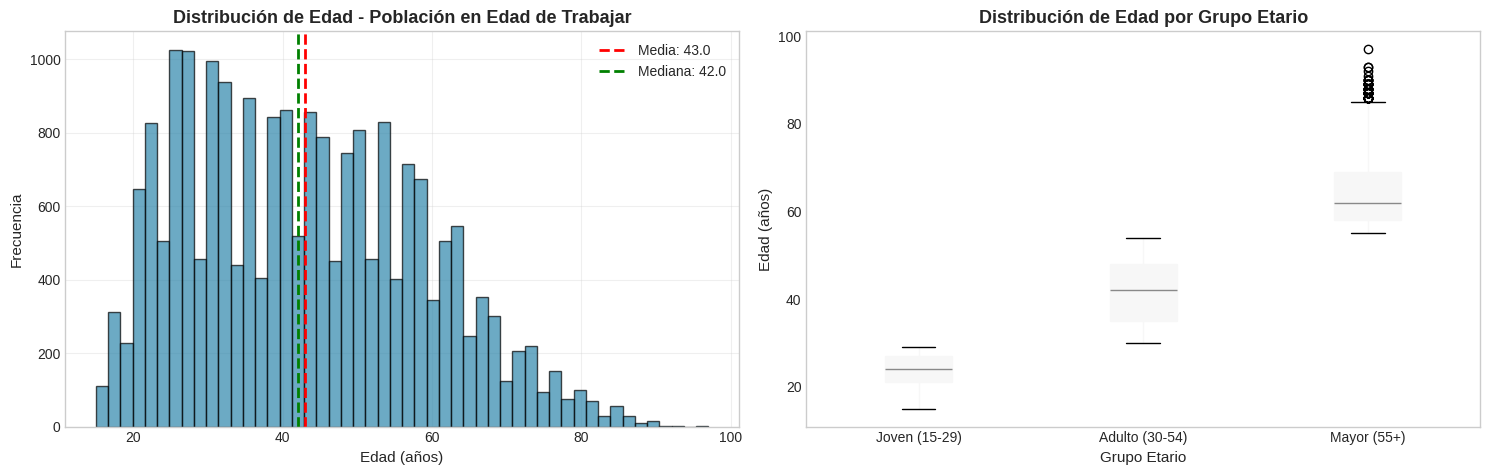

In [18]:
# ============================================
# 1. DISTRIBUCIÓN POR EDAD
# ============================================

print("\n 1. ANÁLISIS DE EDAD")
print("-" * 60)

# Estadísticas descriptivas
print(f"Edad promedio: {df_final['edad'].mean():.1f} años")
print(f"Edad mediana: {df_final['edad'].median():.1f} años")
print(f"Edad mínima: {df_final['edad'].min():.0f} años")
print(f"Edad máxima: {df_final['edad'].max():.0f} años")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma
axes[0].hist(df_final['edad'], bins=50, color=colores_custom['primario'],
             edgecolor='black', alpha=0.7)
axes[0].axvline(df_final['edad'].mean(), color='red', linestyle='--',
                linewidth=2, label=f'Media: {df_final["edad"].mean():.1f}')
axes[0].axvline(df_final['edad'].median(), color='green', linestyle='--',
                linewidth=2, label=f'Mediana: {df_final["edad"].median():.1f}')
axes[0].set_xlabel('Edad (años)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Edad - Población en Edad de Trabajar',
                  fontweight='bold', fontsize=13)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot por grupo etario
df_final.boxplot(column='edad', by='grupo_etario', ax=axes[1],
                 patch_artist=True, grid=False)
axes[1].set_xlabel('Grupo Etario')
axes[1].set_ylabel('Edad (años)')
axes[1].set_title('Distribución de Edad por Grupo Etario',
                  fontweight='bold', fontsize=13)
plt.suptitle('')  # Remover título automático

plt.tight_layout()
plt.show()


 2. ANÁLISIS POR SEXO
------------------------------------------------------------
Hombres: 10,911 (51.4%)
Mujeres: 10,311 (48.6%)


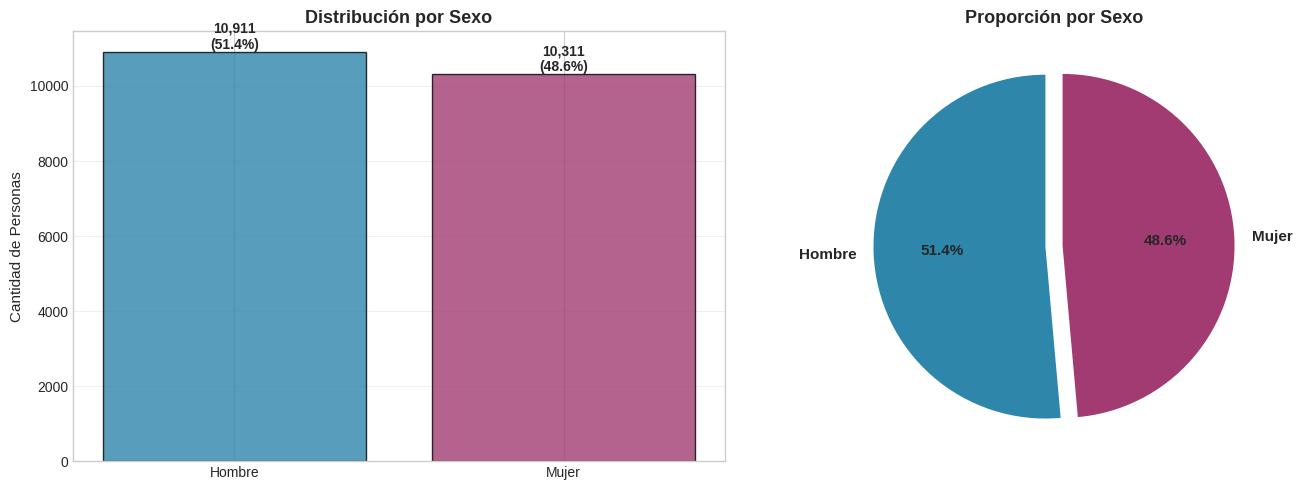

In [57]:
# ============================================
# 2. DISTRIBUCIÓN POR SEXO
# ============================================

print("\n 2. ANÁLISIS POR SEXO")
print("-" * 60)

sexo_counts = df_final['sexo_texto'].value_counts()
sexo_pct = df_final['sexo_texto'].value_counts(normalize=True) * 100

print(f"Hombres: {sexo_counts['Hombre']:,} ({sexo_pct['Hombre']:.1f}%)")
print(f"Mujeres: {sexo_counts['Mujer']:,} ({sexo_pct['Mujer']:.1f}%)")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
bars = axes[0].bar(sexo_counts.index, sexo_counts.values,
                   color=[colores_custom['primario'], colores_custom['secundario']],
                   edgecolor='black', alpha=0.8)
axes[0].set_ylabel('Cantidad de Personas')
axes[0].set_title('Distribución por Sexo', fontweight='bold', fontsize=13)
axes[0].grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}\n({height/len(df_final)*100:.1f}%)',
                ha='center', va='bottom', fontweight='bold')

# Gráfico de torta
colores_sexo = [colores_custom['primario'], colores_custom['secundario']]
wedges, texts, autotexts = axes[1].pie(sexo_counts.values, labels=sexo_counts.index,
                                        autopct='%1.1f%%', startangle=90,
                                        colors=colores_sexo, explode=(0.05, 0.05),
                                        textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Proporción por Sexo', fontweight='bold', fontsize=13)

plt.tight_layout()
plt.show()


 3. ANÁLISIS POR GRUPO ETARIO
------------------------------------------------------------
Joven (15-29): 5,132 (24.2%)
Adulto (30-54): 10,825 (51.0%)
Mayor (55+): 5,265 (24.8%)


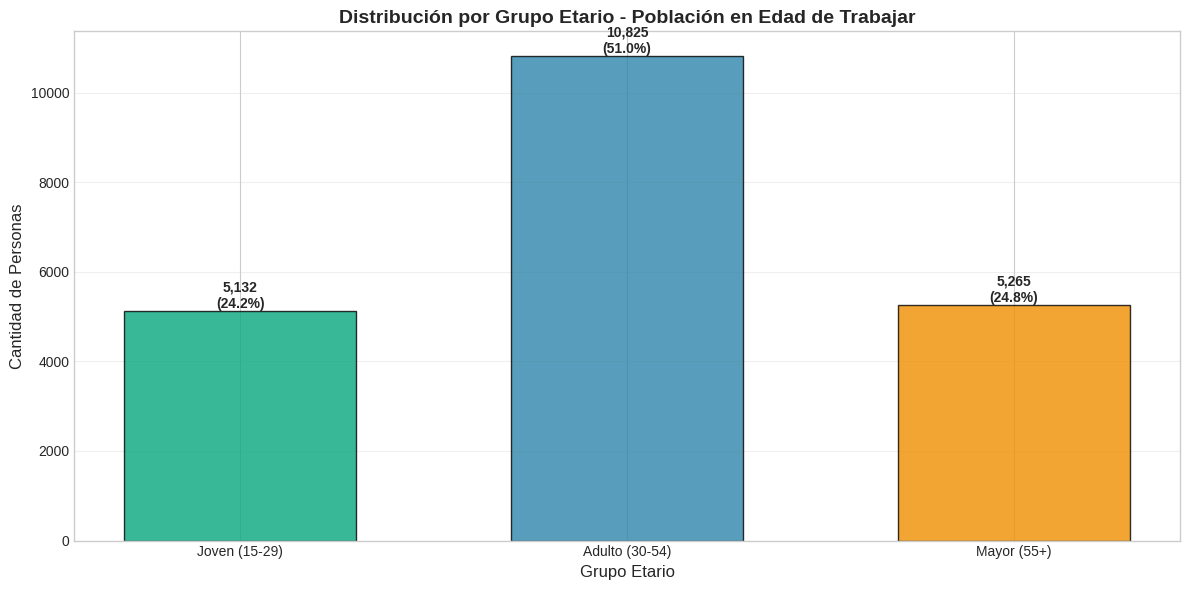

In [26]:
# ============================================
# 3. DISTRIBUCIÓN POR GRUPO ETARIO
# ============================================

print("\n 3. ANÁLISIS POR GRUPO ETARIO")
print("-" * 60)

grupo_counts = df_final['grupo_etario'].value_counts().sort_index()
grupo_pct = df_final['grupo_etario'].value_counts(normalize=True).sort_index() * 100

for grupo, cantidad in grupo_counts.items():
    print(f"{grupo}: {cantidad:,} ({grupo_pct[grupo]:.1f}%)")

# Visualización
fig, ax = plt.subplots(figsize=(12, 6))

colores = [colores_custom['verde'], colores_custom['primario'], colores_custom['terciario']]
bars = ax.bar(grupo_counts.index, grupo_counts.values, color=colores,
              edgecolor='black', alpha=0.8, width=0.6)

ax.set_ylabel('Cantidad de Personas', fontsize=12)
ax.set_xlabel('Grupo Etario', fontsize=12)
ax.set_title('Distribución por Grupo Etario - Población en Edad de Trabajar',
             fontweight='bold', fontsize=14)
ax.grid(axis='y', alpha=0.3)

# Añadir valores
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
           f'{int(height):,}\n({height/len(df_final)*100:.1f}%)',
           ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()


 4. ANÁLISIS POR NIVEL EDUCATIVO
------------------------------------------------------------
Bajo: 5,487 (25.9%)
Medio: 7,902 (37.2%)
Alto: 7,833 (36.9%)


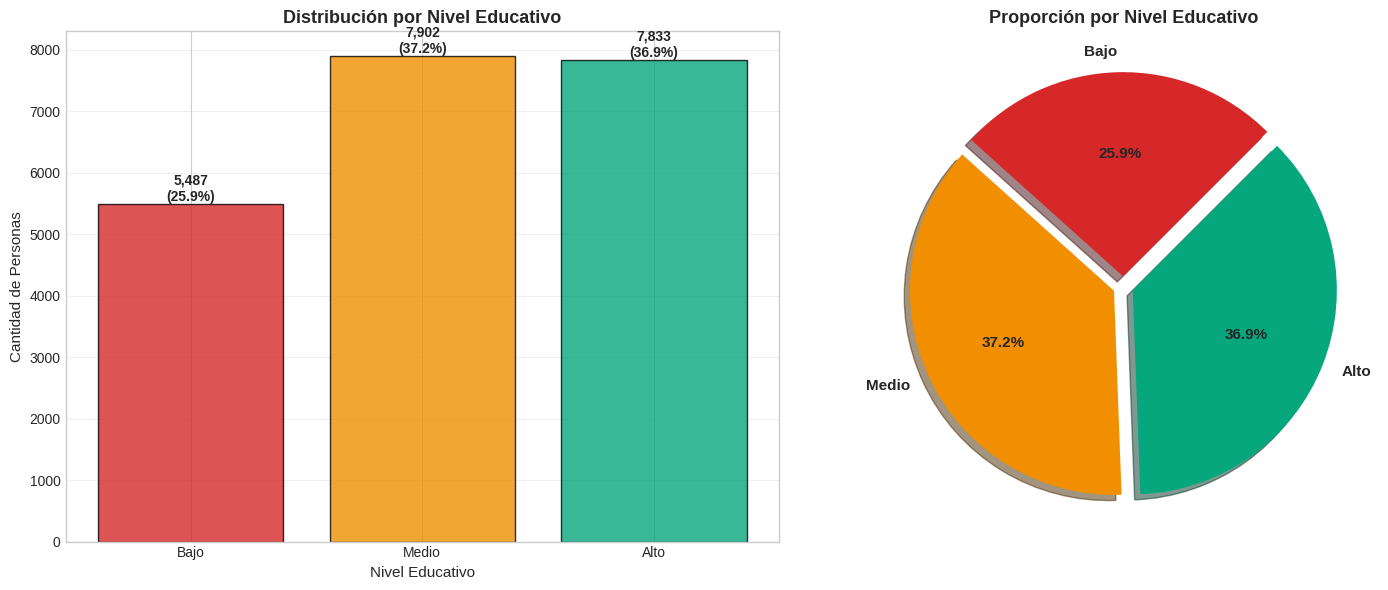

In [58]:
# ============================================
# 4. DISTRIBUCIÓN POR NIVEL EDUCATIVO
# ============================================

print("\n 4. ANÁLISIS POR NIVEL EDUCATIVO")
print("-" * 60)

edu_counts = df_final['educacion_grupo'].value_counts()
edu_pct = df_final['educacion_grupo'].value_counts(normalize=True) * 100

orden_educacion = ['Bajo', 'Medio', 'Alto']
for nivel in orden_educacion:
    if nivel in edu_counts.index:
        print(f"{nivel}: {edu_counts[nivel]:,} ({edu_pct[nivel]:.1f}%)")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
edu_ordenado = edu_counts.reindex(orden_educacion, fill_value=0)
colores_edu = [colores_custom['rojo'], colores_custom['terciario'], colores_custom['verde']]
bars = axes[0].bar(edu_ordenado.index, edu_ordenado.values,
                   color=colores_edu, edgecolor='black', alpha=0.8)
axes[0].set_ylabel('Cantidad de Personas')
axes[0].set_xlabel('Nivel Educativo')
axes[0].set_title('Distribución por Nivel Educativo', fontweight='bold', fontsize=13)
axes[0].grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}\n({height/len(df_final)*100:.1f}%)',
                ha='center', va='bottom', fontweight='bold')

# Gráfico de torta mejorado
wedges, texts, autotexts = axes[1].pie(edu_ordenado.values,
                                        labels=edu_ordenado.index,
                                        autopct='%1.1f%%', startangle=45,
                                        colors=colores_edu, explode=(0.05, 0.05, 0.05),
                                        textprops={'fontsize': 11, 'fontweight': 'bold'},
                                        shadow=True)
axes[1].set_title('Proporción por Nivel Educativo', fontweight='bold', fontsize=13)

plt.tight_layout()
plt.show()


 5. ANÁLISIS DE SITUACIÓN LABORAL
------------------------------------------------------------
Empleado: 20,344 (95.9%)
Desempleado: 878 (4.1%)

 INDICADORES:
Tasa de Participación Laboral: 100.00%
Tasa de Desempleo: 4.14%


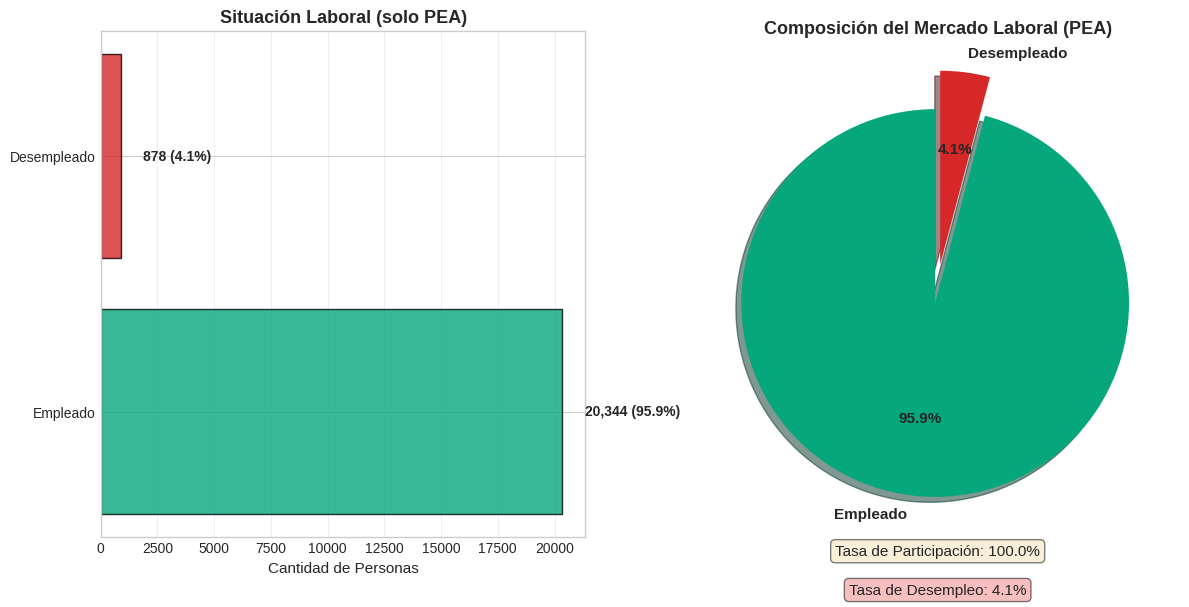

In [37]:
# ============================================
# 5. SITUACIÓN LABORAL GENERAL
# ============================================

print("\n 5. ANÁLISIS DE SITUACIÓN LABORAL")
print("-" * 60)

# Filtrar solo Empleado y Desempleado
df_laboral = df_final[df_final['situacion_laboral'].isin(['Empleado', 'Desempleado'])]

situacion_counts = df_laboral['situacion_laboral'].value_counts()
situacion_pct = df_laboral['situacion_laboral'].value_counts(normalize=True) * 100

for situacion, cantidad in situacion_counts.items():
    print(f"{situacion}: {cantidad:,} ({situacion_pct[situacion]:.1f}%)")

# Calcular PEA y tasas
pea = df_laboral  # Ya filtrado
tasa_participacion = len(pea) / len(df_final) * 100
tasa_desempleo = situacion_counts.get('Desempleado', 0) / len(pea) * 100 if len(pea) > 0 else 0

print(f"\n INDICADORES:")
print(f"Tasa de Participación Laboral: {tasa_participacion:.2f}%")
print(f"Tasa de Desempleo: {tasa_desempleo:.2f}%")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras horizontal
colores_sit = [colores_custom['verde'], colores_custom['rojo']]
orden_situacion = ['Empleado', 'Desempleado']
situacion_ordenado = situacion_counts.reindex(orden_situacion, fill_value=0)

bars = axes[0].barh(situacion_ordenado.index, situacion_ordenado.values,
                    color=colores_sit, edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Cantidad de Personas', fontsize=11)
axes[0].set_title('Situación Laboral (solo PEA)', fontweight='bold', fontsize=13)
axes[0].grid(axis='x', alpha=0.3)

for i, bar in enumerate(bars):
    width = bar.get_width()
    axes[0].text(width + 1000, bar.get_y() + bar.get_height()/2.,
                f'{int(width):,} ({width/len(df_final)*100:.1f}%)',
                ha='left', va='center', fontweight='bold', fontsize=10)

# Gráfico de torta con indicadores
sizes = situacion_ordenado.values
explode = (0.1, 0.1)
wedges, texts, autotexts = axes[1].pie(sizes, labels=situacion_ordenado.index,
                                        autopct='%1.1f%%', startangle=90,
                                        colors=colores_sit, explode=explode,
                                        textprops={'fontsize': 11, 'fontweight': 'bold'},
                                        shadow=True)

# Añadir texto con tasas
axes[1].text(0, -1.4, f'Tasa de Participación: {tasa_participacion:.1f}%',
            ha='center', fontsize=11, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
axes[1].text(0, -1.6, f'Tasa de Desempleo: {tasa_desempleo:.1f}%',
            ha='center', fontsize=11, bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))
axes[1].set_title('Composición del Mercado Laboral (PEA)', fontweight='bold', fontsize=13)

plt.tight_layout()
plt.show()



 6. ANÁLISIS DE HORAS TRABAJADAS (Solo Empleados)
------------------------------------------------------------
Empleados totales: 20,344
Promedio de horas: 35.6 horas/semana
Mediana de horas: 40.0 horas/semana
Mínimo: 1 horas
Máximo: 105 horas

Distribución:
Menos de 40h: 8,419 (41.4%)
Exactamente 40h: 7,307 (35.9%)
Más de 40h: 4,618 (22.7%)


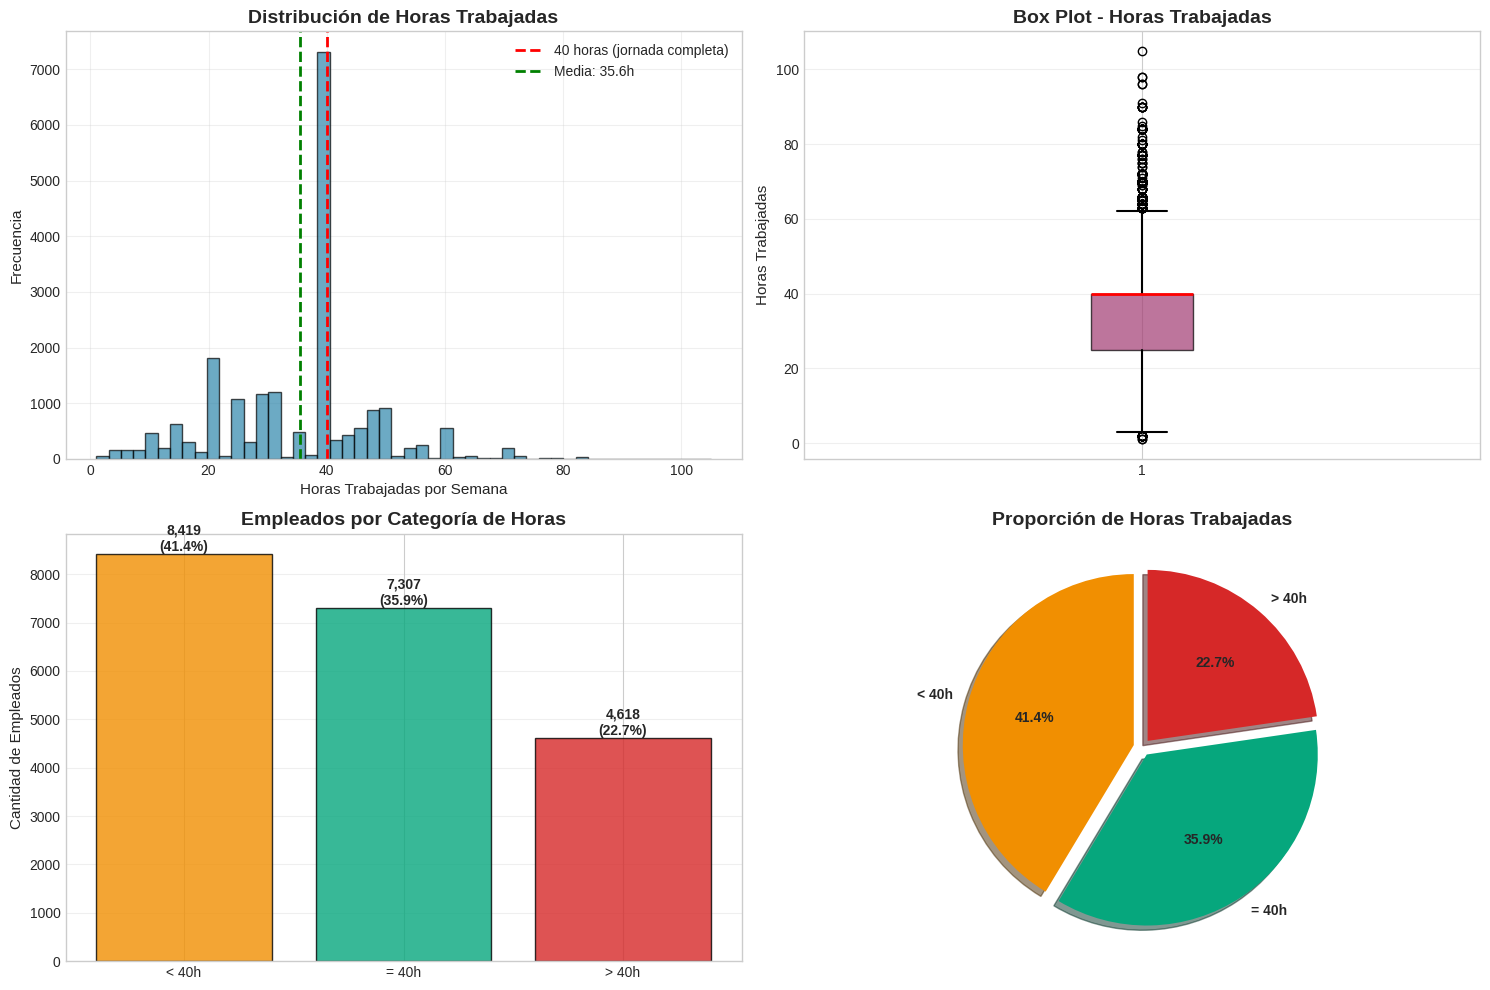

In [59]:
# ============================================
# 6. ANÁLISIS DE HORAS TRABAJADAS
# ============================================

print("\n 6. ANÁLISIS DE HORAS TRABAJADAS (Solo Empleados)")
print("-" * 60)

empleados = df_final[df_final['empleo'] == 1]
horas_trabajadas = empleados['horas_trabajadas']

print(f"Empleados totales: {len(empleados):,}")
print(f"Promedio de horas: {horas_trabajadas.mean():.1f} horas/semana")
print(f"Mediana de horas: {horas_trabajadas.median():.1f} horas/semana")
print(f"Mínimo: {horas_trabajadas.min():.0f} horas")
print(f"Máximo: {horas_trabajadas.max():.0f} horas")

# Categorizar
menos_40 = (horas_trabajadas < 40).sum()
exacto_40 = (horas_trabajadas == 40).sum()
mas_40 = (horas_trabajadas > 40).sum()

print(f"\nDistribución:")
print(f"Menos de 40h: {menos_40:,} ({menos_40/len(empleados)*100:.1f}%)")
print(f"Exactamente 40h: {exacto_40:,} ({exacto_40/len(empleados)*100:.1f}%)")
print(f"Más de 40h: {mas_40:,} ({mas_40/len(empleados)*100:.1f}%)")

# Visualización
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histograma
axes[0, 0].hist(horas_trabajadas, bins=50, color=colores_custom['primario'],
                edgecolor='black', alpha=0.7)
axes[0, 0].axvline(40, color='red', linestyle='--', linewidth=2, label='40 horas (jornada completa)')
axes[0, 0].axvline(horas_trabajadas.mean(), color='green', linestyle='--',
                   linewidth=2, label=f'Media: {horas_trabajadas.mean():.1f}h')
axes[0, 0].set_xlabel('Horas Trabajadas por Semana')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Distribución de Horas Trabajadas', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Box plot
axes[0, 1].boxplot(horas_trabajadas, vert=True, patch_artist=True,
                   boxprops=dict(facecolor=colores_custom['secundario'], alpha=0.7),
                   medianprops=dict(color='red', linewidth=2),
                   whiskerprops=dict(linewidth=1.5),
                   capprops=dict(linewidth=1.5))
axes[0, 1].set_ylabel('Horas Trabajadas')
axes[0, 1].set_title('Box Plot - Horas Trabajadas', fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

# Categorías
categorias = ['< 40h', '= 40h', '> 40h']
valores = [menos_40, exacto_40, mas_40]
colores_cat = [colores_custom['terciario'], colores_custom['verde'], colores_custom['rojo']]

bars = axes[1, 0].bar(categorias, valores, color=colores_cat, edgecolor='black', alpha=0.8)
axes[1, 0].set_ylabel('Cantidad de Empleados')
axes[1, 0].set_title('Empleados por Categoría de Horas', fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                   f'{int(height):,}\n({height/len(empleados)*100:.1f}%)',
                   ha='center', va='bottom', fontweight='bold')

# Pie chart
axes[1, 1].pie(valores, labels=categorias, autopct='%1.1f%%',
               colors=colores_cat, startangle=90, explode=(0.05, 0.05, 0.05),
               textprops={'fontweight': 'bold'}, shadow=True)
axes[1, 1].set_title('Proporción de Horas Trabajadas', fontweight='bold')

plt.tight_layout()
plt.show()


 7. ANÁLISIS DE FORMALIDAD E INFORMALIDAD
------------------------------------------------------------
Empleo Formal: 12,362 (60.8%)
Empleo Informal: 7,982 (39.2%)


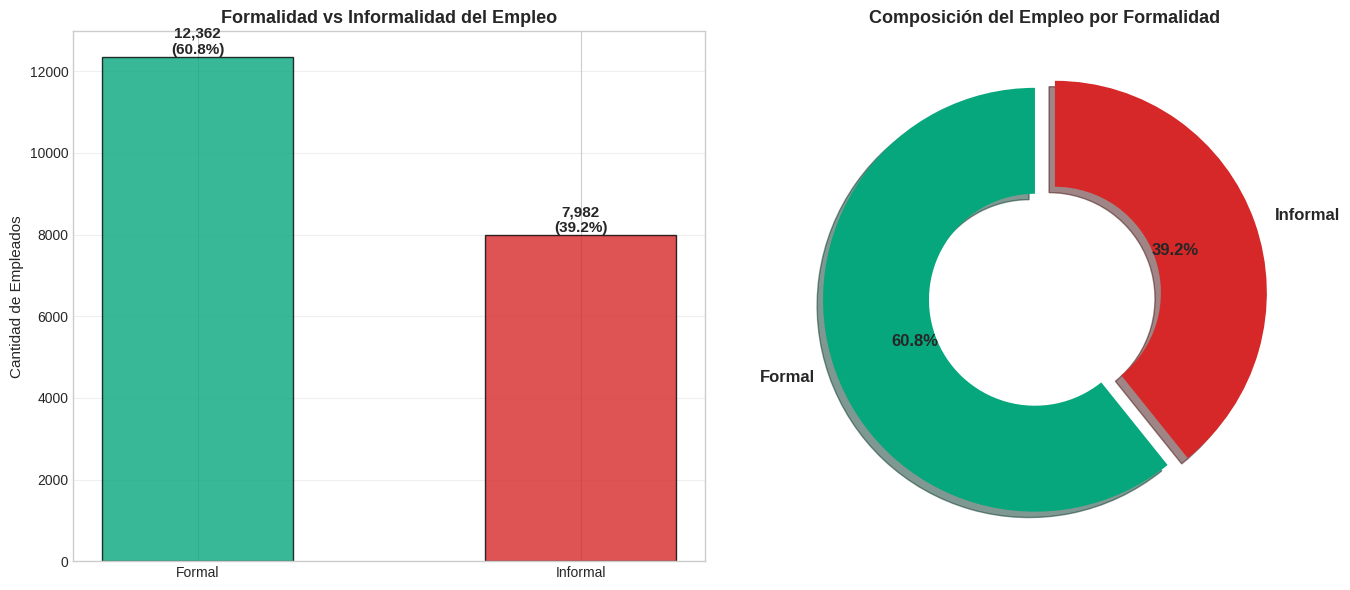

In [60]:
# ============================================
# 7. ANÁLISIS DE FORMALIDAD E INFORMALIDAD
# ============================================

print("\n 7. ANÁLISIS DE FORMALIDAD E INFORMALIDAD")
print("-" * 60)

# Calcular solo para empleados
formales = (empleados['empleo_formal'] == 1).sum()
informales = (empleados['empleo_formal'] == 0).sum()

tasa_formalidad = formales / len(empleados) * 100
tasa_informalidad = informales / len(empleados) * 100

print(f"Empleo Formal: {formales:,} ({tasa_formalidad:.1f}%)")
print(f"Empleo Informal: {informales:,} ({tasa_informalidad:.1f}%)")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de barras
categorias_formal = ['Formal', 'Informal']
valores_formal = [formales, informales]
colores_formal = [colores_custom['verde'], colores_custom['rojo']]

bars = axes[0].bar(categorias_formal, valores_formal, color=colores_formal,
                   edgecolor='black', alpha=0.8, width=0.5)
axes[0].set_ylabel('Cantidad de Empleados', fontsize=11)
axes[0].set_title('Formalidad vs Informalidad del Empleo', fontweight='bold', fontsize=13)
axes[0].grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}\n({height/len(empleados)*100:.1f}%)',
                ha='center', va='bottom', fontweight='bold', fontsize=11)

# Gráfico de dona
wedges, texts, autotexts = axes[1].pie(valores_formal, labels=categorias_formal,
                                        autopct='%1.1f%%', startangle=90,
                                        colors=colores_formal, explode=(0.05, 0.05),
                                        textprops={'fontsize': 12, 'fontweight': 'bold'},
                                        wedgeprops=dict(width=0.5), shadow=True)
axes[1].set_title('Composición del Empleo por Formalidad', fontweight='bold', fontsize=13)

plt.tight_layout()
plt.show()


 8. ANÁLISIS DE SUBEMPLEO
------------------------------------------------------------
Subempleados: 1,151 (5.7% de los empleados)
Empleados plenos: 19,193 (94.3%)


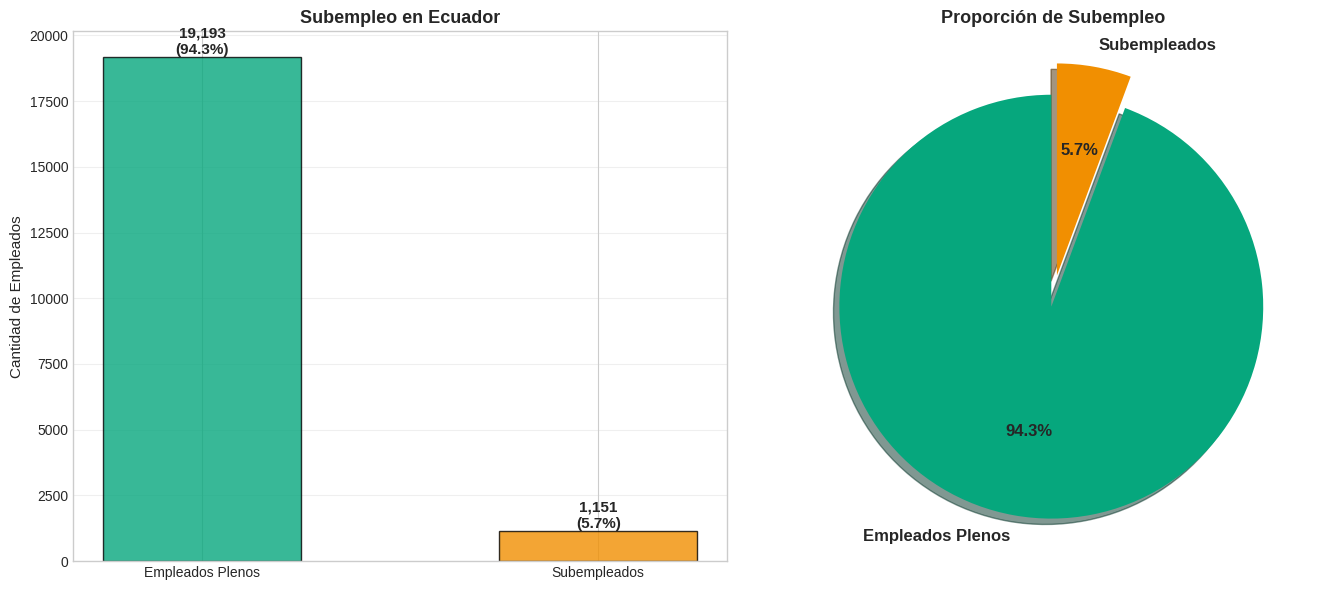

In [61]:
# ============================================
# 8. ANÁLISIS DE SUBEMPLEO
# ============================================

print("\n 8. ANÁLISIS DE SUBEMPLEO")
print("-" * 60)

subempleados = df_final['subempleado'].sum()
tasa_subempleo = subempleados / len(empleados) * 100

print(f"Subempleados: {subempleados:,} ({tasa_subempleo:.1f}% de los empleados)")
print(f"Empleados plenos: {len(empleados) - subempleados:,} ({100-tasa_subempleo:.1f}%)")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Barras
categorias_sub = ['Empleados Plenos', 'Subempleados']
valores_sub = [len(empleados) - subempleados, subempleados]
colores_sub = [colores_custom['verde'], colores_custom['terciario']]

bars = axes[0].bar(categorias_sub, valores_sub, color=colores_sub,
                   edgecolor='black', alpha=0.8, width=0.5)
axes[0].set_ylabel('Cantidad de Empleados', fontsize=11)
axes[0].set_title('Subempleo en Ecuador', fontweight='bold', fontsize=13)
axes[0].grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}\n({height/len(empleados)*100:.1f}%)',
                ha='center', va='bottom', fontweight='bold', fontsize=11)

# Pie chart
wedges, texts, autotexts = axes[1].pie(valores_sub, labels=categorias_sub,
                                        autopct='%1.1f%%', startangle=90,
                                        colors=colores_sub, explode=(0.05, 0.1),
                                        textprops={'fontsize': 12, 'fontweight': 'bold'},
                                        shadow=True)
axes[1].set_title('Proporción de Subempleo', fontweight='bold', fontsize=13)

plt.tight_layout()
plt.show()


 9. ANÁLISIS DE INGRESOS LABORALES
------------------------------------------------------------
Empleados con ingreso registrado: 20,344
Ingreso promedio: $951.93
Ingreso mediano: $460.00
Ingreso mínimo: $-1.00
Ingreso máximo: $999,999.00
Desviación estándar: $19,825.06

Cuartil 25%: $180.00
Cuartil 75%: $718.00


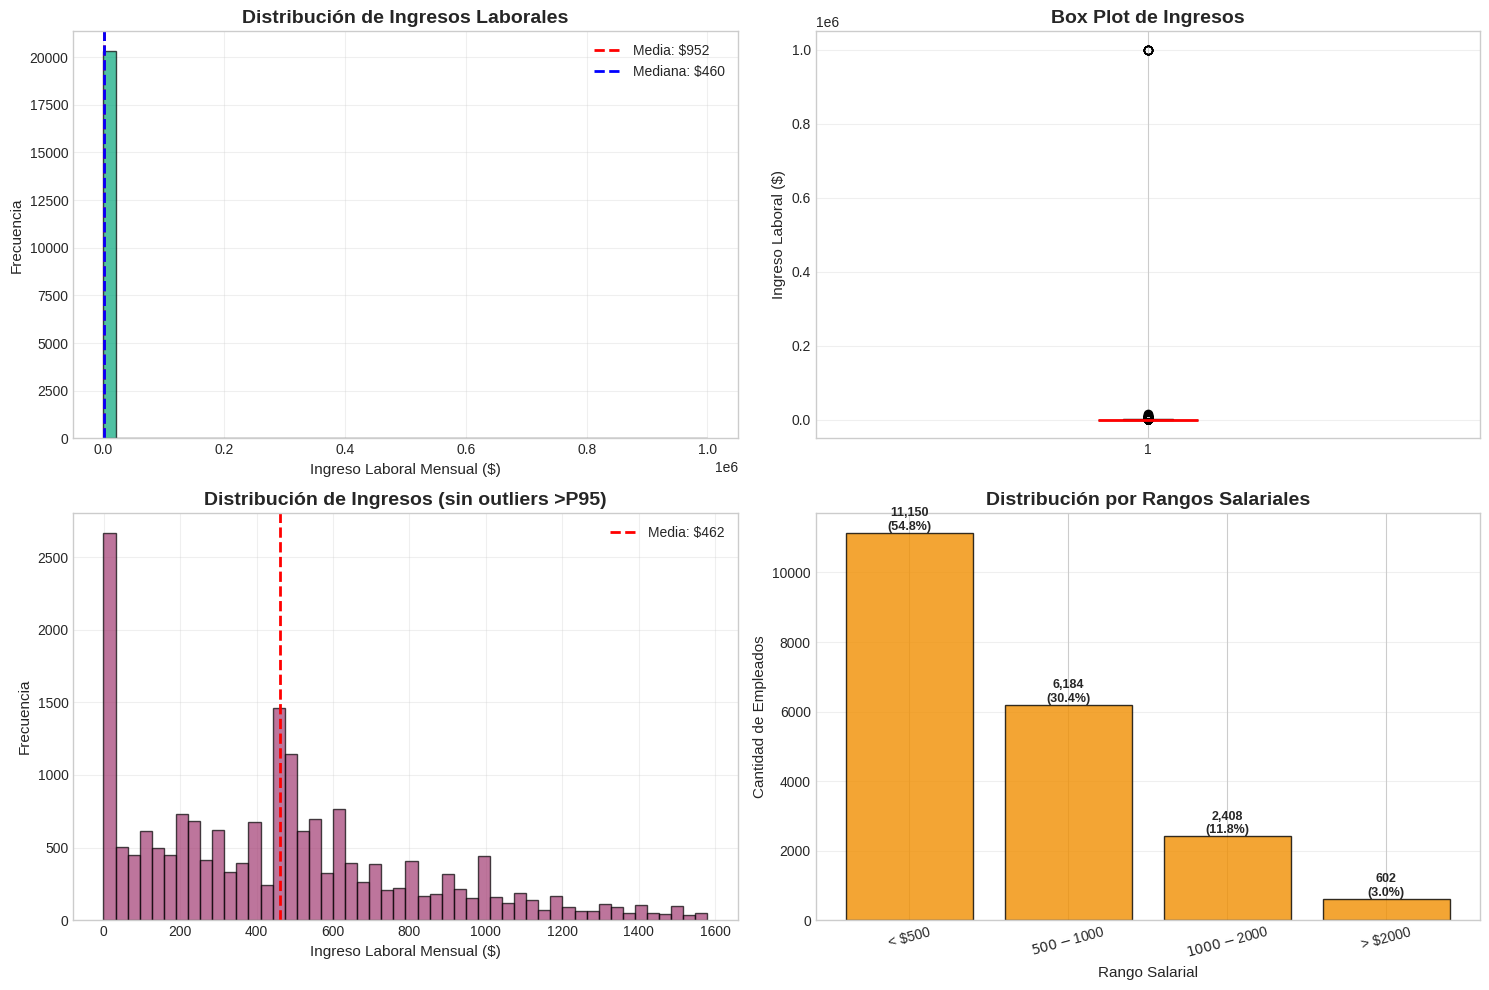

In [44]:
# ============================================
# 9. ANÁLISIS DE INGRESOS LABORALES
# ============================================

print("\n 9. ANÁLISIS DE INGRESOS LABORALES")
print("-" * 60)

ingresos = empleados['ingreso_laboral'].dropna()

if len(ingresos) > 0:
    print(f"Empleados con ingreso registrado: {len(ingresos):,}")
    print(f"Ingreso promedio: ${ingresos.mean():,.2f}")
    print(f"Ingreso mediano: ${ingresos.median():,.2f}")
    print(f"Ingreso mínimo: ${ingresos.min():,.2f}")
    print(f"Ingreso máximo: ${ingresos.max():,.2f}")
    print(f"Desviación estándar: ${ingresos.std():,.2f}")

    # Cuartiles
    q1 = ingresos.quantile(0.25)
    q3 = ingresos.quantile(0.75)
    print(f"\nCuartil 25%: ${q1:,.2f}")
    print(f"Cuartil 75%: ${q3:,.2f}")

    # Visualización
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Histograma
    axes[0, 0].hist(ingresos, bins=50, color=colores_custom['verde'],
                    edgecolor='black', alpha=0.7)
    axes[0, 0].axvline(ingresos.mean(), color='red', linestyle='--',
                       linewidth=2, label=f'Media: ${ingresos.mean():,.0f}')
    axes[0, 0].axvline(ingresos.median(), color='blue', linestyle='--',
                       linewidth=2, label=f'Mediana: ${ingresos.median():,.0f}')
    axes[0, 0].set_xlabel('Ingreso Laboral Mensual ($)')
    axes[0, 0].set_ylabel('Frecuencia')
    axes[0, 0].set_title('Distribución de Ingresos Laborales', fontweight='bold')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)

    # Box plot
    axes[0, 1].boxplot(ingresos, vert=True, patch_artist=True,
                       boxprops=dict(facecolor=colores_custom['primario'], alpha=0.7),
                       medianprops=dict(color='red', linewidth=2))
    axes[0, 1].set_ylabel('Ingreso Laboral ($)')
    axes[0, 1].set_title('Box Plot de Ingresos', fontweight='bold')
    axes[0, 1].grid(axis='y', alpha=0.3)

    # Histograma sin outliers (percentil 95)
    p95 = ingresos.quantile(0.95)
    ingresos_sin_outliers = ingresos[ingresos <= p95]

    axes[1, 0].hist(ingresos_sin_outliers, bins=50, color=colores_custom['secundario'],
                    edgecolor='black', alpha=0.7)
    axes[1, 0].axvline(ingresos_sin_outliers.mean(), color='red', linestyle='--',
                       linewidth=2, label=f'Media: ${ingresos_sin_outliers.mean():,.0f}')
    axes[1, 0].set_xlabel('Ingreso Laboral Mensual ($)')
    axes[1, 0].set_ylabel('Frecuencia')
    axes[1, 0].set_title('Distribución de Ingresos (sin outliers >P95)', fontweight='bold')
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3)

    # Rangos salariales
    rangos = ['< $500', '$500-$1000', '$1000-$2000', '> $2000']
    conteos_rangos = [
        (ingresos < 500).sum(),
        ((ingresos >= 500) & (ingresos < 1000)).sum(),
        ((ingresos >= 1000) & (ingresos < 2000)).sum(),
        (ingresos >= 2000).sum()
    ]

    bars = axes[1, 1].bar(rangos, conteos_rangos, color=colores_custom['terciario'],
                          edgecolor='black', alpha=0.8)
    axes[1, 1].set_ylabel('Cantidad de Empleados')
    axes[1, 1].set_xlabel('Rango Salarial')
    axes[1, 1].set_title('Distribución por Rangos Salariales', fontweight='bold')
    axes[1, 1].grid(axis='y', alpha=0.3)
    axes[1, 1].tick_params(axis='x', rotation=15)

    for bar in bars:
        height = bar.get_height()
        axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                       f'{int(height):,}\n({height/len(ingresos)*100:.1f}%)',
                       ha='center', va='bottom', fontweight='bold', fontsize=9)

    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No hay datos de ingresos disponibles")

In [45]:
# ============================================
# PARTE B: ANÁLISIS BIVARIADO
# ============================================

print("\n" + "="*70)
print("ANÁLISIS BIVARIADO - RELACIONES ENTRE VARIABLES")
print("="*70)


ANÁLISIS BIVARIADO - RELACIONES ENTRE VARIABLES



 1. DESEMPLEO POR GRUPO ETARIO
------------------------------------------------------------
Joven (15-29): 9.24% de desempleo
Adulto (30-54): 3.28% de desempleo
Mayor (55+): 0.93% de desempleo


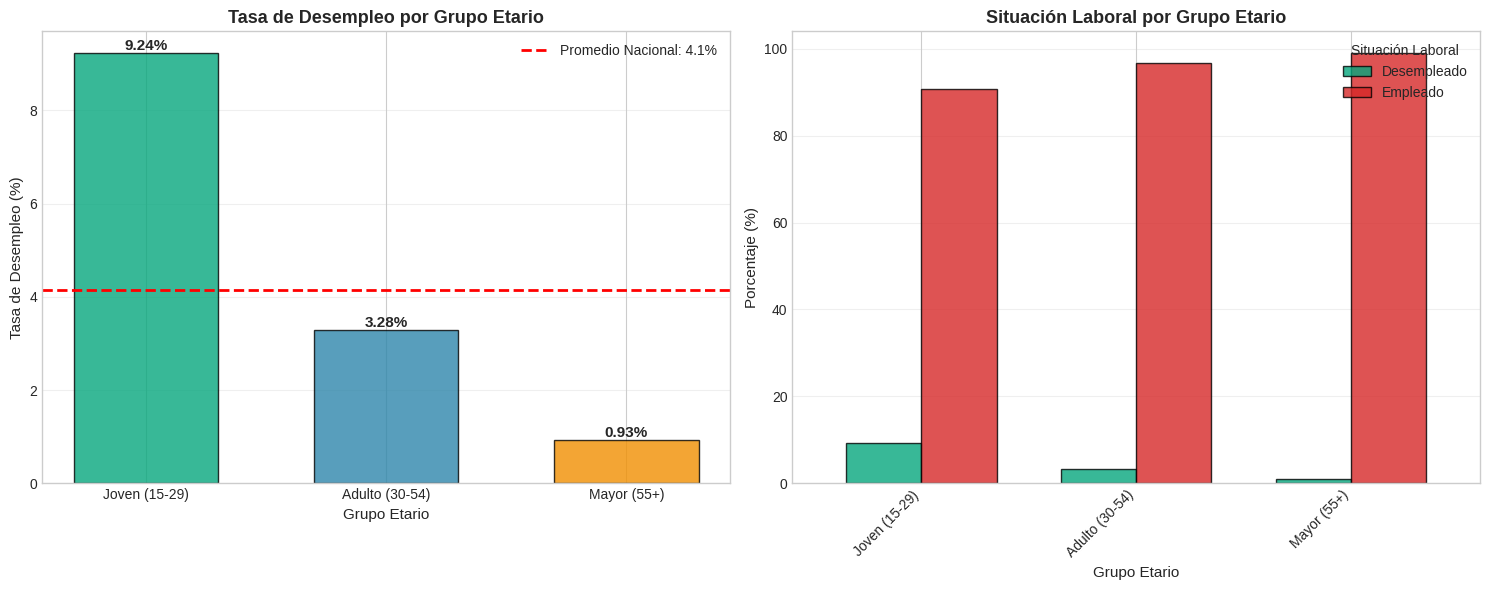


 HALLAZGO: Los jóvenes tienen 5.96 puntos porcentuales MÁS desempleo que los adultos


In [49]:
# ============================================
# 1. DESEMPLEO POR GRUPO ETARIO
# ============================================

print("\n 1. DESEMPLEO POR GRUPO ETARIO")
print("-" * 60)

# Calcular tasas de desempleo por grupo etario
tasas_desempleo_edad = []
grupos = ['Joven (15-29)', 'Adulto (30-54)', 'Mayor (55+)']

for grupo in grupos:
    pea_grupo = df_final[(df_final['grupo_etario'] == grupo) &
                         (df_final['situacion_laboral'].isin(['Empleado', 'Desempleado']))]
    desempleados_grupo = df_final[(df_final['grupo_etario'] == grupo) &
                                   (df_final['situacion_laboral'] == 'Desempleado')]

    if len(pea_grupo) > 0:
        tasa = len(desempleados_grupo) / len(pea_grupo) * 100
    else:
        tasa = 0

    tasas_desempleo_edad.append(tasa)
    print(f"{grupo}: {tasa:.2f}% de desempleo")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
colores_edad = [colores_custom['verde'], colores_custom['primario'], colores_custom['terciario']]
bars = axes[0].bar(grupos, tasas_desempleo_edad, color=colores_edad,
                   edgecolor='black', alpha=0.8, width=0.6)
axes[0].set_ylabel('Tasa de Desempleo (%)', fontsize=11)
axes[0].set_xlabel('Grupo Etario', fontsize=11)
axes[0].set_title('Tasa de Desempleo por Grupo Etario', fontweight='bold', fontsize=13)
axes[0].grid(axis='y', alpha=0.3)
axes[0].axhline(y=tasa_desempleo, color='red', linestyle='--',
                linewidth=2, label=f'Promedio Nacional: {tasa_desempleo:.1f}%')
axes[0].legend()

for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}%',
                ha='center', va='bottom', fontweight='bold', fontsize=11)

# Tabla de contingencia
contingencia_edad = pd.crosstab(df_final['grupo_etario'],
                                df_final['situacion_laboral'],
                                normalize='index') * 100

contingencia_edad.plot(kind='bar', stacked=False, ax=axes[1],
                       color=[colores_custom['verde'], colores_custom['rojo'], colores_custom['gris']],
                       edgecolor='black', alpha=0.8, width=0.7)
axes[1].set_ylabel('Porcentaje (%)', fontsize=11)
axes[1].set_xlabel('Grupo Etario', fontsize=11)
axes[1].set_title('Situación Laboral por Grupo Etario', fontweight='bold', fontsize=13)
axes[1].legend(title='Situación Laboral', loc='upper right')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Interpretación
if tasas_desempleo_edad[0] > tasas_desempleo_edad[1]:
    print(f"\n HALLAZGO: Los jóvenes tienen {tasas_desempleo_edad[0] - tasas_desempleo_edad[1]:.2f} puntos porcentuales MÁS desempleo que los adultos")


 2. BRECHA DE GÉNERO EN DESEMPLEO
------------------------------------------------------------
Hombre: 4.09% de desempleo
Mujer: 4.19% de desempleo

 Brecha de género: 0.10 puntos porcentuales


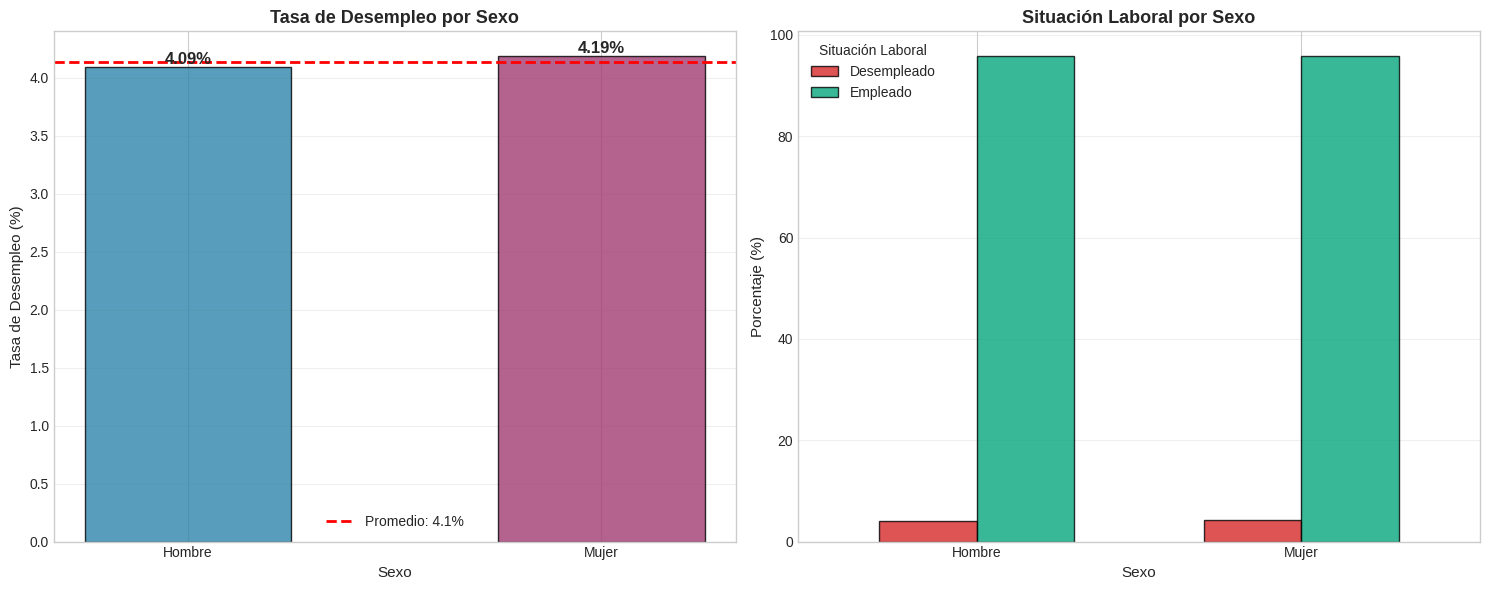

In [51]:
# ============================================
# 2. DESEMPLEO POR SEXO
# ============================================

print("\n 2. BRECHA DE GÉNERO EN DESEMPLEO")
print("-" * 60)

# Calcular tasas por sexo
tasas_desempleo_sexo = []
sexos = ['Hombre', 'Mujer']

for sexo in sexos:
    pea_sexo = df_final[(df_final['sexo_texto'] == sexo) &
                        (df_final['situacion_laboral'].isin(['Empleado', 'Desempleado']))]
    desempleados_sexo = df_final[(df_final['sexo_texto'] == sexo) &
                                  (df_final['situacion_laboral'] == 'Desempleado')]

    if len(pea_sexo) > 0:
        tasa = len(desempleados_sexo) / len(pea_sexo) * 100
    else:
        tasa = 0

    tasas_desempleo_sexo.append(tasa)
    print(f"{sexo}: {tasa:.2f}% de desempleo")

brecha_genero = abs(tasas_desempleo_sexo[1] - tasas_desempleo_sexo[0])
print(f"\n Brecha de género: {brecha_genero:.2f} puntos porcentuales")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Barras comparativas
colores_sexo = [colores_custom['primario'], colores_custom['secundario']]
bars = axes[0].bar(sexos, tasas_desempleo_sexo, color=colores_sexo,
                   edgecolor='black', alpha=0.8, width=0.5)
axes[0].set_ylabel('Tasa de Desempleo (%)', fontsize=11)
axes[0].set_xlabel('Sexo', fontsize=11)
axes[0].set_title('Tasa de Desempleo por Sexo', fontweight='bold', fontsize=13)
axes[0].grid(axis='y', alpha=0.3)
axes[0].axhline(y=tasa_desempleo, color='red', linestyle='--',
                linewidth=2, label=f'Promedio: {tasa_desempleo:.1f}%')
axes[0].legend()

for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}%',
                ha='center', va='bottom', fontweight='bold', fontsize=12)

# Situación laboral por sexo
contingencia_sexo = pd.crosstab(df_final['sexo_texto'],
                                df_final['situacion_laboral'],
                                normalize='index') * 100

contingencia_sexo.plot(kind='bar', ax=axes[1],
                       color=[colores_custom['rojo'], colores_custom['verde'], colores_custom['gris']],
                       edgecolor='black', alpha=0.8, width=0.6)
axes[1].set_ylabel('Porcentaje (%)', fontsize=11)
axes[1].set_xlabel('Sexo', fontsize=11)
axes[1].set_title('Situación Laboral por Sexo', fontweight='bold', fontsize=13)
axes[1].legend(title='Situación Laboral')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


 3. DESEMPLEO POR GRUPO ETARIO Y SEXO
------------------------------------------------------------
Joven (15-29) - Hombre: 8.02%
Joven (15-29) - Mujer: 10.77%
Adulto (30-54) - Hombre: 3.43%
Adulto (30-54) - Mujer: 3.13%
Mayor (55+) - Hombre: 1.22%
Mayor (55+) - Mujer: 0.63%

📋 Tabla de Tasas de Desempleo (%):
                Hombre  Mujer
Joven (15-29)     8.02  10.77
Adulto (30-54)    3.43   3.13
Mayor (55+)       1.22   0.63


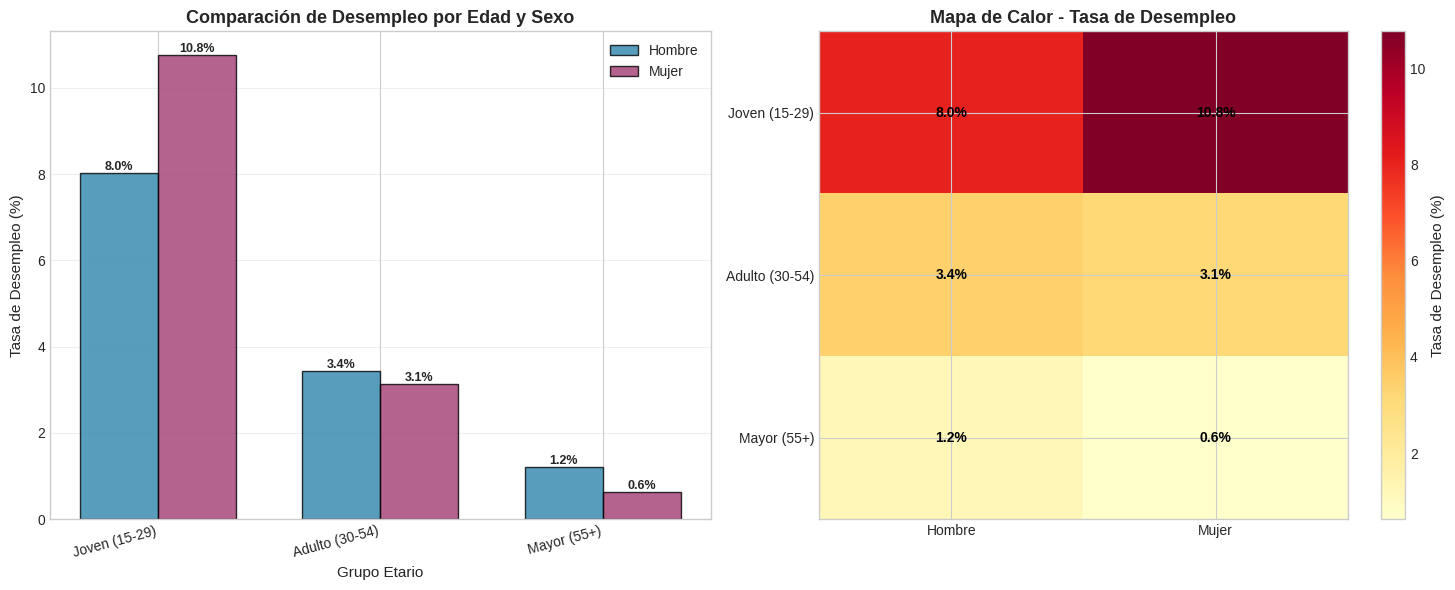


 GRUPO MÁS VULNERABLE: Joven (15-29) - Mujer (10.77% desempleo)


In [52]:
# ============================================
# 3. DESEMPLEO POR GRUPO ETARIO Y SEXO (CRUCE)
# ============================================

print("\n 3. DESEMPLEO POR GRUPO ETARIO Y SEXO")
print("-" * 60)

# Crear tabla cruzada
tasas_cruzadas = []

for grupo in grupos:
    fila = []
    for sexo in sexos:
        pea_sub = df_final[(df_final['grupo_etario'] == grupo) &
                           (df_final['sexo_texto'] == sexo) &
                           (df_final['situacion_laboral'].isin(['Empleado', 'Desempleado']))]
        desempleados_sub = df_final[(df_final['grupo_etario'] == grupo) &
                                     (df_final['sexo_texto'] == sexo) &
                                     (df_final['situacion_laboral'] == 'Desempleado')]

        if len(pea_sub) > 0:
            tasa = len(desempleados_sub) / len(pea_sub) * 100
        else:
            tasa = 0

        fila.append(tasa)
        print(f"{grupo} - {sexo}: {tasa:.2f}%")

    tasas_cruzadas.append(fila)

# Crear DataFrame para visualización
df_tasas = pd.DataFrame(tasas_cruzadas, columns=sexos, index=grupos)

print("\n📋 Tabla de Tasas de Desempleo (%):")
print(df_tasas.round(2))

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras agrupadas
x = np.arange(len(grupos))
width = 0.35

bars1 = axes[0].bar(x - width/2, df_tasas['Hombre'], width,
                    label='Hombre', color=colores_custom['primario'],
                    edgecolor='black', alpha=0.8)
bars2 = axes[0].bar(x + width/2, df_tasas['Mujer'], width,
                    label='Mujer', color=colores_custom['secundario'],
                    edgecolor='black', alpha=0.8)

axes[0].set_ylabel('Tasa de Desempleo (%)', fontsize=11)
axes[0].set_xlabel('Grupo Etario', fontsize=11)
axes[0].set_title('Comparación de Desempleo por Edad y Sexo', fontweight='bold', fontsize=13)
axes[0].set_xticks(x)
axes[0].set_xticklabels(grupos, rotation=15, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}%',
                    ha='center', va='bottom', fontsize=9, fontweight='bold')

# Heatmap
im = axes[1].imshow(df_tasas.values, cmap='YlOrRd', aspect='auto')
axes[1].set_xticks(np.arange(len(sexos)))
axes[1].set_yticks(np.arange(len(grupos)))
axes[1].set_xticklabels(sexos)
axes[1].set_yticklabels(grupos)
axes[1].set_title('Mapa de Calor - Tasa de Desempleo', fontweight='bold', fontsize=13)

# Añadir valores en el heatmap
for i in range(len(grupos)):
    for j in range(len(sexos)):
        text = axes[1].text(j, i, f'{df_tasas.values[i, j]:.1f}%',
                           ha="center", va="center", color="black", fontweight='bold')

plt.colorbar(im, ax=axes[1], label='Tasa de Desempleo (%)')
plt.tight_layout()
plt.show()

# Identificar grupo más vulnerable
max_tasa = df_tasas.max().max()
posicion = np.where(df_tasas.values == max_tasa)
grupo_vulnerable = grupos[posicion[0][0]]
sexo_vulnerable = sexos[posicion[1][0]]

print(f"\n GRUPO MÁS VULNERABLE: {grupo_vulnerable} - {sexo_vulnerable} ({max_tasa:.2f}% desempleo)")


 4. IMPACTO DE LA EDUCACIÓN EN EL EMPLEO
------------------------------------------------------------
Educación Bajo: 0.87% de desempleo
Educación Medio: 4.23% de desempleo
Educación Alto: 6.33% de desempleo


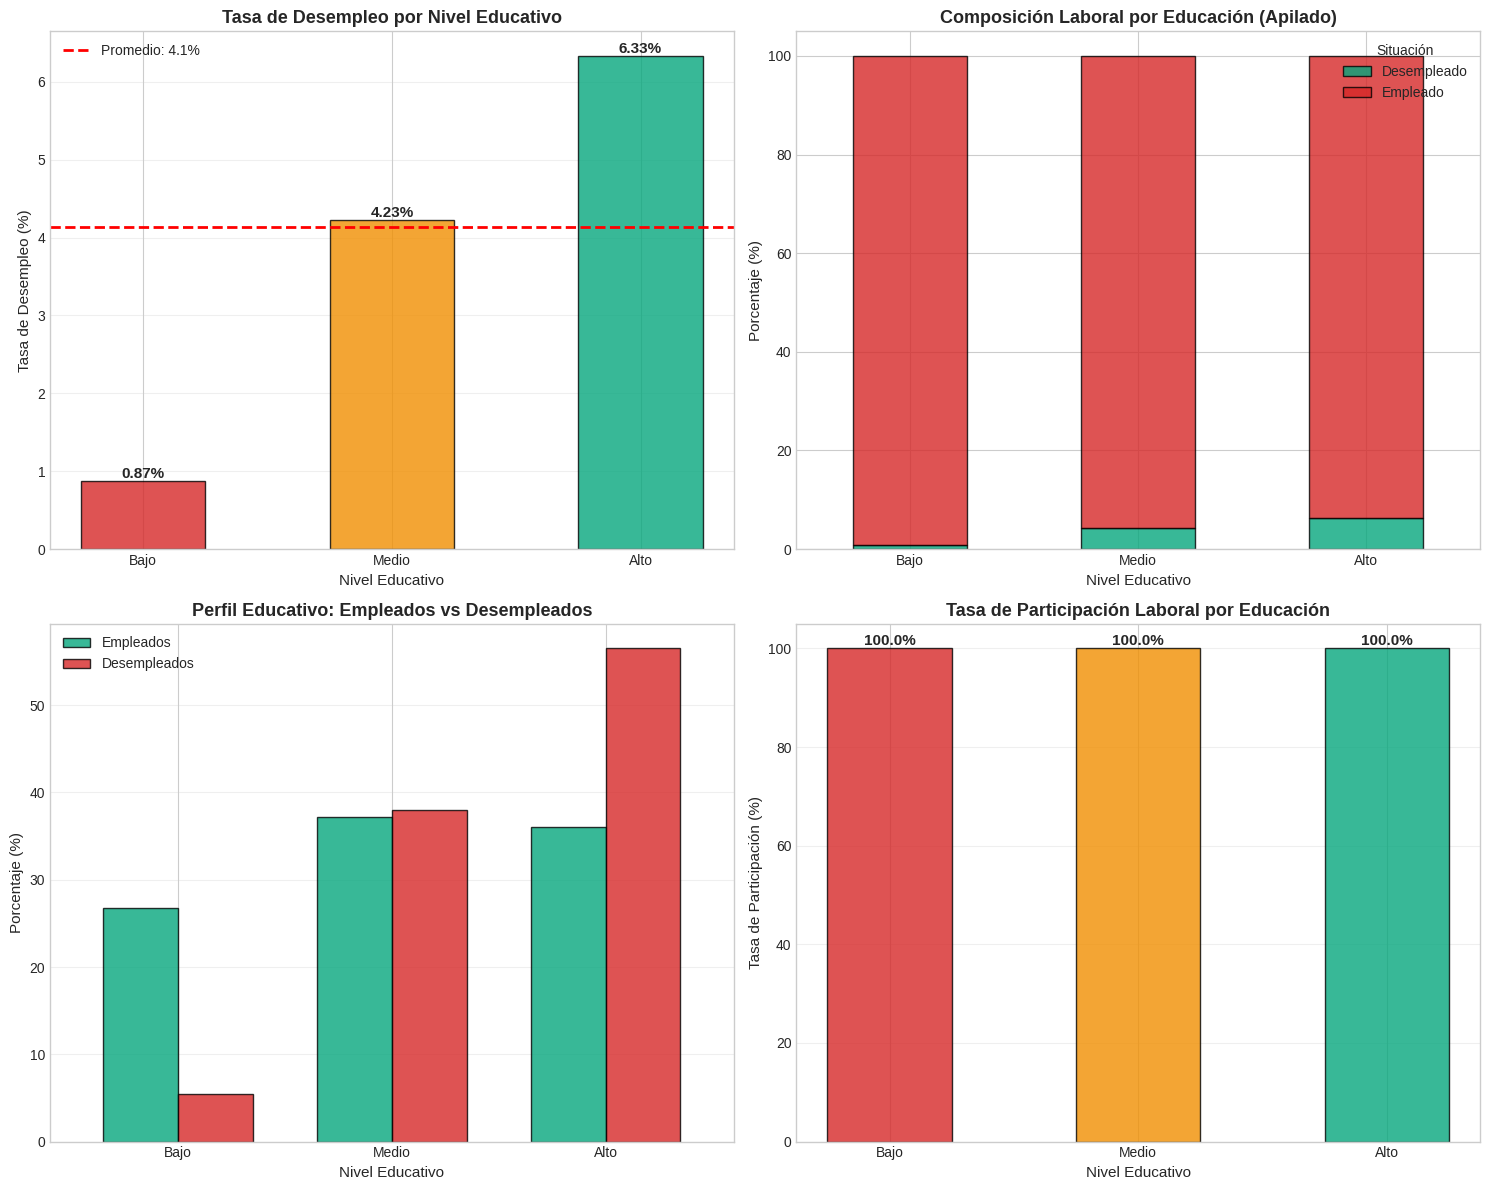


 HALLAZGO: La diferencia en desempleo entre educación Baja y Alta es de -5.46 puntos porcentuales


In [54]:
# ============================================
# 4. EDUCACIÓN Y EMPLEO
# ============================================

print("\n 4. IMPACTO DE LA EDUCACIÓN EN EL EMPLEO")
print("-" * 60)

# Tasas de desempleo por educación
tasas_desempleo_edu = []
niveles_edu = ['Bajo', 'Medio', 'Alto']

for nivel in niveles_edu:
    pea_edu = df_final[(df_final['educacion_grupo'] == nivel) &
                       (df_final['situacion_laboral'].isin(['Empleado', 'Desempleado']))]
    desempleados_edu = df_final[(df_final['educacion_grupo'] == nivel) &
                                 (df_final['situacion_laboral'] == 'Desempleado')]

    if len(pea_edu) > 0:
        tasa = len(desempleados_edu) / len(pea_edu) * 100
    else:
        tasa = 0

    tasas_desempleo_edu.append(tasa)
    print(f"Educación {nivel}: {tasa:.2f}% de desempleo")

# Visualización
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Tasas de desempleo por educación
colores_edu = [colores_custom['rojo'], colores_custom['terciario'], colores_custom['verde']]
bars = axes[0, 0].bar(niveles_edu, tasas_desempleo_edu, color=colores_edu,
                      edgecolor='black', alpha=0.8, width=0.5)
axes[0, 0].set_ylabel('Tasa de Desempleo (%)', fontsize=11)
axes[0, 0].set_xlabel('Nivel Educativo', fontsize=11)
axes[0, 0].set_title('Tasa de Desempleo por Nivel Educativo', fontweight='bold', fontsize=13)
axes[0, 0].grid(axis='y', alpha=0.3)
axes[0, 0].axhline(y=tasa_desempleo, color='red', linestyle='--',
                   linewidth=2, label=f'Promedio: {tasa_desempleo:.1f}%')
axes[0, 0].legend()

for bar in bars:
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.2f}%',
                   ha='center', va='bottom', fontweight='bold', fontsize=11)

# Situación laboral por educación
contingencia_edu = pd.crosstab(df_final['educacion_grupo'],
                               df_final['situacion_laboral'],
                               normalize='index') * 100

contingencia_edu.reindex(niveles_edu).plot(kind='bar', stacked=True, ax=axes[0, 1],
                                           color=[colores_custom['verde'], colores_custom['rojo'], colores_custom['gris']],
                                           edgecolor='black', alpha=0.8)
axes[0, 1].set_ylabel('Porcentaje (%)', fontsize=11)
axes[0, 1].set_xlabel('Nivel Educativo', fontsize=11)
axes[0, 1].set_title('Composición Laboral por Educación (Apilado)', fontweight='bold', fontsize=13)
axes[0, 1].legend(title='Situación', loc='upper right')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)

# Educación de empleados vs desempleados
empleados_edu = df_final[df_final['situacion_laboral'] == 'Empleado']['educacion_grupo'].value_counts(normalize=True) * 100
desempleados_edu = df_final[df_final['situacion_laboral'] == 'Desempleado']['educacion_grupo'].value_counts(normalize=True) * 100

df_comparacion = pd.DataFrame({
    'Empleados': empleados_edu.reindex(niveles_edu, fill_value=0),
    'Desempleados': desempleados_edu.reindex(niveles_edu, fill_value=0)
})

df_comparacion.plot(kind='bar', ax=axes[1, 0], color=[colores_custom['verde'], colores_custom['rojo']],
                    edgecolor='black', alpha=0.8, width=0.7)
axes[1, 0].set_ylabel('Porcentaje (%)', fontsize=11)
axes[1, 0].set_xlabel('Nivel Educativo', fontsize=11)
axes[1, 0].set_title('Perfil Educativo: Empleados vs Desempleados', fontweight='bold', fontsize=13)
axes[1, 0].legend()
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)
axes[1, 0].grid(axis='y', alpha=0.3)

# Tasa de participación laboral por educación
participacion_edu = []
for nivel in niveles_edu:
    total_nivel = (df_final['educacion_grupo'] == nivel).sum()
    pea_nivel = df_final[(df_final['educacion_grupo'] == nivel) &
                         (df_final['situacion_laboral'].isin(['Empleado', 'Desempleado']))].shape[0]

    if total_nivel > 0:
        tasa_part = pea_nivel / total_nivel * 100
    else:
        tasa_part = 0

    participacion_edu.append(tasa_part)

bars = axes[1, 1].bar(niveles_edu, participacion_edu, color=colores_edu,
                      edgecolor='black', alpha=0.8, width=0.5)
axes[1, 1].set_ylabel('Tasa de Participación (%)', fontsize=11)
axes[1, 1].set_xlabel('Nivel Educativo', fontsize=11)
axes[1, 1].set_title('Tasa de Participación Laboral por Educación', fontweight='bold', fontsize=13)
axes[1, 1].grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.1f}%',
                   ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

# Interpretación
print(f"\n HALLAZGO: La diferencia en desempleo entre educación Baja y Alta es de {tasas_desempleo_edu[0] - tasas_desempleo_edu[2]:.2f} puntos porcentuales")


📊 5. ANÁLISIS DE SUBEMPLEO POR CARACTERÍSTICAS
------------------------------------------------------------
Subempleo por Grupo Etario:
  Joven (15-29): 5.86%
  Adulto (30-54): 5.95%
  Mayor (55+): 4.89%

Subempleo por Sexo:
  Hombre: 6.56%
  Mujer: 4.71%

Subempleo por Nivel Educativo:
  Bajo: 6.49%
  Medio: 6.01%
  Alto: 4.67%


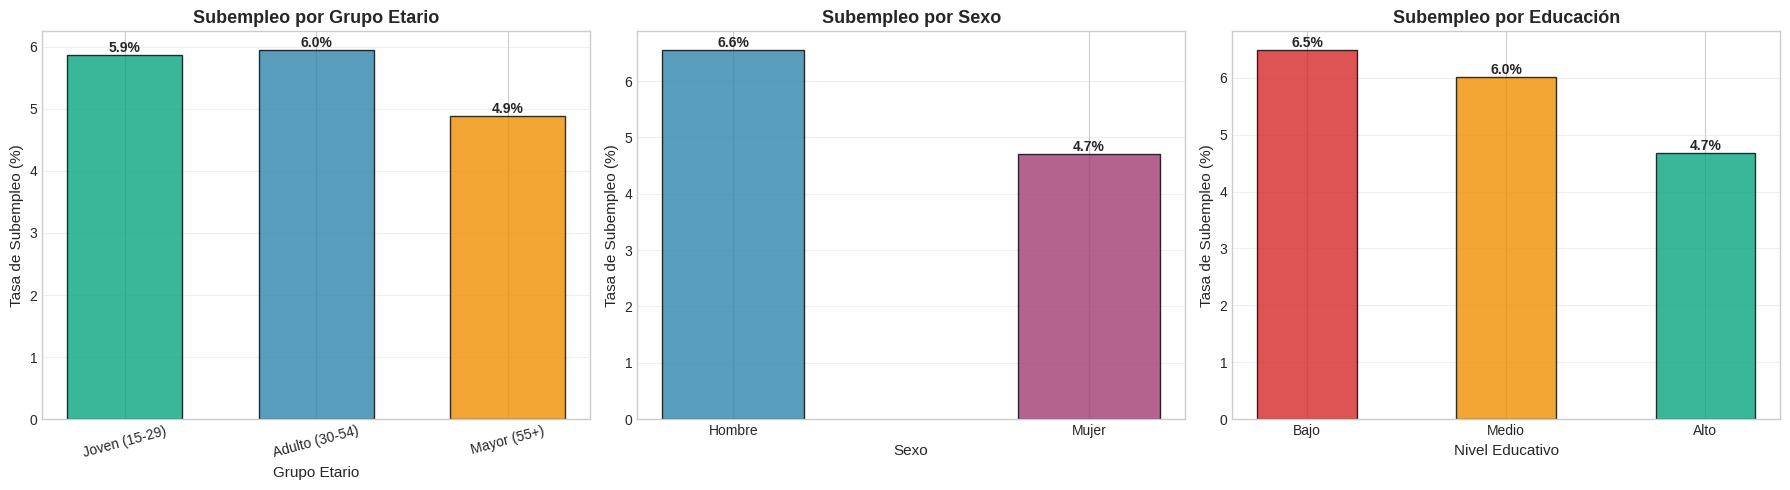

In [55]:
# ============================================
# 5. SUBEMPLEO POR CARACTERÍSTICAS
# ============================================

print("\n📊 5. ANÁLISIS DE SUBEMPLEO POR CARACTERÍSTICAS")
print("-" * 60)

# Subempleo por grupo etario
print("Subempleo por Grupo Etario:")
for grupo in grupos:
    empleados_grupo = df_final[(df_final['grupo_etario'] == grupo) & (df_final['empleo'] == 1)]
    subempleados_grupo = df_final[(df_final['grupo_etario'] == grupo) & (df_final['subempleado'] == 1)]

    if len(empleados_grupo) > 0:
        tasa_sub = len(subempleados_grupo) / len(empleados_grupo) * 100
    else:
        tasa_sub = 0

    print(f"  {grupo}: {tasa_sub:.2f}%")

# Subempleo por sexo
print("\nSubempleo por Sexo:")
tasas_subempleo_sexo = []
for sexo in sexos:
    empleados_sexo = df_final[(df_final['sexo_texto'] == sexo) & (df_final['empleo'] == 1)]
    subempleados_sexo = df_final[(df_final['sexo_texto'] == sexo) & (df_final['subempleado'] == 1)]

    if len(empleados_sexo) > 0:
        tasa_sub = len(subempleados_sexo) / len(empleados_sexo) * 100
    else:
        tasa_sub = 0

    tasas_subempleo_sexo.append(tasa_sub)
    print(f"  {sexo}: {tasa_sub:.2f}%")

# Subempleo por educación
print("\nSubempleo por Nivel Educativo:")
tasas_subempleo_edu = []
for nivel in niveles_edu:
    empleados_edu = df_final[(df_final['educacion_grupo'] == nivel) & (df_final['empleo'] == 1)]
    subempleados_edu = df_final[(df_final['educacion_grupo'] == nivel) & (df_final['subempleado'] == 1)]

    if len(empleados_edu) > 0:
        tasa_sub = len(subempleados_edu) / len(empleados_edu) * 100
    else:
        tasa_sub = 0

    tasas_subempleo_edu.append(tasa_sub)
    print(f"  {nivel}: {tasa_sub:.2f}%")

# Visualización
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Por edad
bars = axes[0].bar(grupos, [tasa_sub for tasa_sub in [
    (df_final[(df_final['grupo_etario'] == g) & (df_final['subempleado'] == 1)].shape[0] /
     df_final[(df_final['grupo_etario'] == g) & (df_final['empleo'] == 1)].shape[0] * 100
     if df_final[(df_final['grupo_etario'] == g) & (df_final['empleo'] == 1)].shape[0] > 0 else 0)
    for g in grupos
]], color=colores_edad, edgecolor='black', alpha=0.8, width=0.6)

axes[0].set_ylabel('Tasa de Subempleo (%)', fontsize=11)
axes[0].set_xlabel('Grupo Etario', fontsize=11)
axes[0].set_title('Subempleo por Grupo Etario', fontweight='bold', fontsize=13)
axes[0].grid(axis='y', alpha=0.3)
axes[0].tick_params(axis='x', rotation=15)

for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontweight='bold', fontsize=10)

# Por sexo
bars = axes[1].bar(sexos, tasas_subempleo_sexo, color=colores_sexo,
                   edgecolor='black', alpha=0.8, width=0.4)
axes[1].set_ylabel('Tasa de Subempleo (%)', fontsize=11)
axes[1].set_xlabel('Sexo', fontsize=11)
axes[1].set_title('Subempleo por Sexo', fontweight='bold', fontsize=13)
axes[1].grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontweight='bold', fontsize=10)

# Por educación
bars = axes[2].bar(niveles_edu, tasas_subempleo_edu, color=colores_edu,
                   edgecolor='black', alpha=0.8, width=0.5)
axes[2].set_ylabel('Tasa de Subempleo (%)', fontsize=11)
axes[2].set_xlabel('Nivel Educativo', fontsize=11)
axes[2].set_title('Subempleo por Educación', fontweight='bold', fontsize=13)
axes[2].grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()


 6. ANÁLISIS DE INFORMALIDAD
------------------------------------------------------------
Informalidad por Grupo Etario:
  Joven (15-29): 35.29%
  Adulto (30-54): 33.54%
  Mayor (55+): 54.18%

Informalidad por Sexo:
  Hombre: 37.29%
  Mujer: 41.30%

Informalidad por Nivel Educativo:
  Bajo: 72.07%
  Medio: 41.46%
  Alto: 12.59%


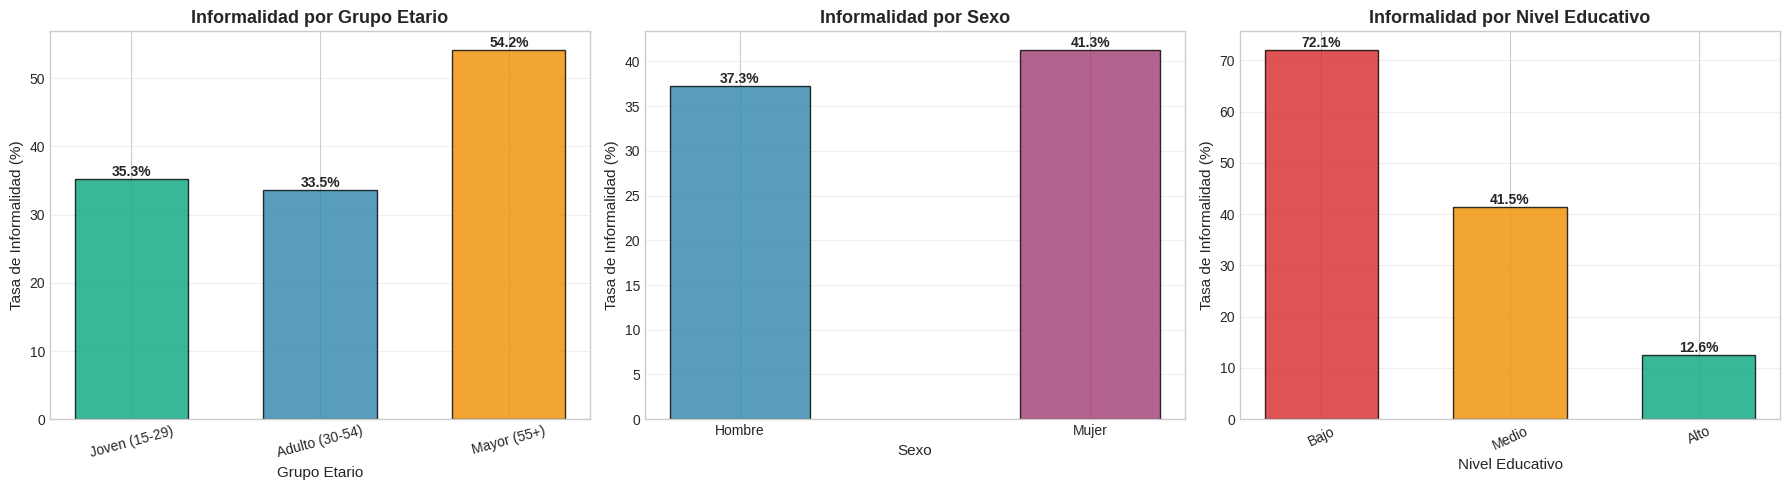

In [56]:
# ============================================
# 6. INFORMALIDAD POR CARACTERÍSTICAS
# ============================================

print("\n 6. ANÁLISIS DE INFORMALIDAD")
print("-" * 60)

# Solo empleados
empleados_df = df_final[df_final['empleo'] == 1].copy()

# Informalidad por grupo etario
print("Informalidad por Grupo Etario:")
tasas_informalidad_edad = []
for grupo in grupos:
    empleados_grupo = empleados_df[empleados_df['grupo_etario'] == grupo]
    informales_grupo = empleados_grupo[empleados_grupo['empleo_formal'] == 0]

    if len(empleados_grupo) > 0:
        tasa_inf = len(informales_grupo) / len(empleados_grupo) * 100
    else:
        tasa_inf = 0

    tasas_informalidad_edad.append(tasa_inf)
    print(f"  {grupo}: {tasa_inf:.2f}%")

# Informalidad por sexo
print("\nInformalidad por Sexo:")
tasas_informalidad_sexo = []
for sexo in sexos:
    empleados_sexo = empleados_df[empleados_df['sexo_texto'] == sexo]
    informales_sexo = empleados_sexo[empleados_sexo['empleo_formal'] == 0]

    if len(empleados_sexo) > 0:
        tasa_inf = len(informales_sexo) / len(empleados_sexo) * 100
    else:
        tasa_inf = 0

    tasas_informalidad_sexo.append(tasa_inf)
    print(f"  {sexo}: {tasa_inf:.2f}%")

# Informalidad por educación
print("\nInformalidad por Nivel Educativo:")
tasas_informalidad_edu = []
for nivel in niveles_edu:
    empleados_edu = empleados_df[empleados_df['educacion_grupo'] == nivel]
    informales_edu = empleados_edu[empleados_edu['empleo_formal'] == 0]

    if len(empleados_edu) > 0:
        tasa_inf = len(informales_edu) / len(empleados_edu) * 100
    else:
        tasa_inf = 0

    tasas_informalidad_edu.append(tasa_inf)
    print(f"  {nivel}: {tasa_inf:.2f}%")

# ============================================
# VISUALIZACIONES
# ============================================

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Por edad
bars = axes[0].bar(grupos, tasas_informalidad_edad, color=colores_edad,
                   edgecolor='black', alpha=0.8, width=0.6)
axes[0].set_ylabel('Tasa de Informalidad (%)', fontsize=11)
axes[0].set_xlabel('Grupo Etario', fontsize=11)
axes[0].set_title('Informalidad por Grupo Etario', fontweight='bold', fontsize=13)
axes[0].grid(axis='y', alpha=0.3)
axes[0].tick_params(axis='x', rotation=15)

for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%', ha='center', va='bottom',
                fontweight='bold', fontsize=10)

# Por sexo
bars = axes[1].bar(sexos, tasas_informalidad_sexo, color=colores_sexo,
                   edgecolor='black', alpha=0.8, width=0.4)
axes[1].set_ylabel('Tasa de Informalidad (%)', fontsize=11)
axes[1].set_xlabel('Sexo', fontsize=11)
axes[1].set_title('Informalidad por Sexo', fontweight='bold', fontsize=13)
axes[1].grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%', ha='center', va='bottom',
                fontweight='bold', fontsize=10)

# Por nivel educativo
bars = axes[2].bar(niveles_edu, tasas_informalidad_edu, color=colores_edu,
                   edgecolor='black', alpha=0.8, width=0.6)
axes[2].set_ylabel('Tasa de Informalidad (%)', fontsize=11)
axes[2].set_xlabel('Nivel Educativo', fontsize=11)
axes[2].set_title('Informalidad por Nivel Educativo', fontweight='bold', fontsize=13)
axes[2].grid(axis='y', alpha=0.3)
axes[2].tick_params(axis='x', rotation=25)

for bar in bars:
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%', ha='center', va='bottom',
                fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()



 Calidad del Empleo

Porcentaje con seguro social por grupo etario:
grupo_etario
Joven (15-29)     152.41
Adulto (30-54)    131.21
Mayor (55+)       136.79
Name: tiene_seguro_social, dtype: float64

Porcentaje con empleo formal por educación:
educacion_grupo
Alto     87.41
Bajo     27.93
Medio    58.54
Name: empleo_formal, dtype: float64


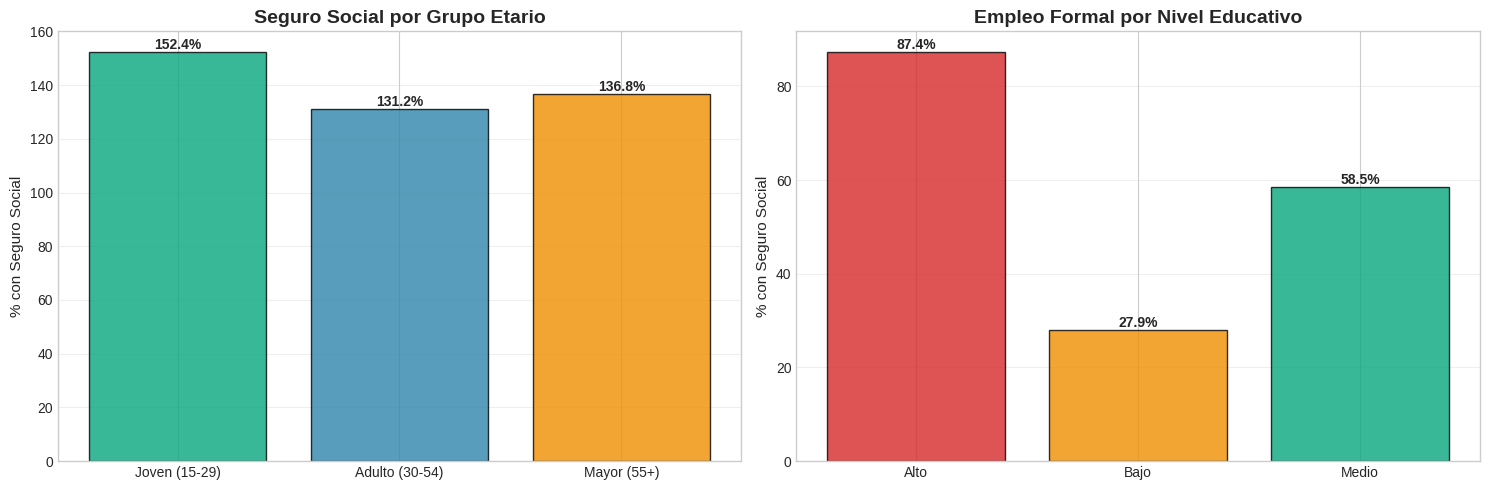

In [64]:
# ---------------------------
# 10A. CALIDAD DEL EMPLEO
# ---------------------------

print("\n Calidad del Empleo")

# % con seguro social por grupo etario
seguro_edad = empleados_df.groupby('grupo_etario')['tiene_seguro_social'].mean() * 100
print("\nPorcentaje con seguro social por grupo etario:")
print(seguro_edad.round(2))

# % con empleo formal por nivel educativo
formal_edu = empleados_df.groupby('educacion_grupo')['empleo_formal'].mean() * 100
print("\nPorcentaje con empleo formal por educación:")
print(formal_edu.round(2))

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Seguro social
bars = axes[0].bar(seguro_edad.index, seguro_edad.values, color=colores_edad,
                   edgecolor='black', alpha=0.8)
axes[0].set_ylabel('% con Seguro Social')
axes[0].set_title('Seguro Social por Grupo Etario', fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# Empleo formal por educación
bars = axes[1].bar(formal_edu.index, formal_edu.values, color=colores_edu,
                   edgecolor='black', alpha=0.8)
axes[1].set_ylabel('% con Seguro Social')
axes[1].set_title('Empleo Formal por Nivel Educativo', fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


💼 ANÁLISIS DE EMPLEO POR ÁREA GEOGRÁFICA
------------------------------------------------------------

Tasa de empleo por área (%):
  area_texto  tasa_empleo
0      Rural        98.32
1     Urbana        95.14


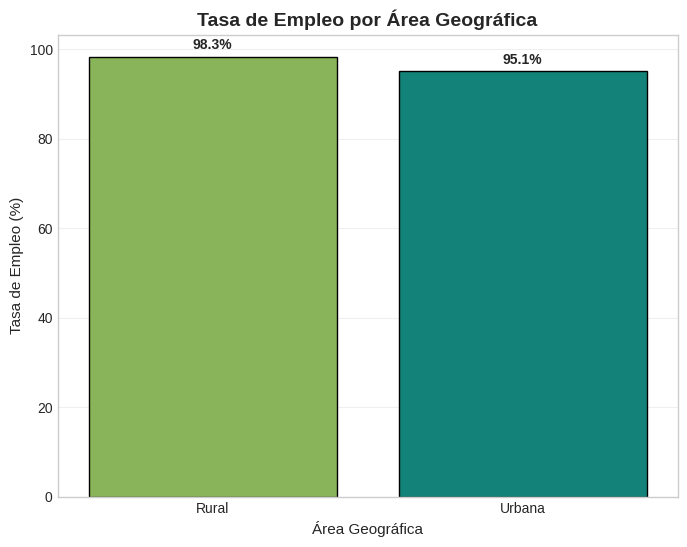

In [77]:
# ============================================
# 10F. ANÁLISIS DE EMPLEO POR ÁREA GEOGRÁFICA
# ============================================

print("\n💼 ANÁLISIS DE EMPLEO POR ÁREA GEOGRÁFICA")
print("-" * 60)

# Aseguramos que la variable de empleo esté bien codificada (1 = empleado)
empleo_area = (
    df_final.groupby('area_texto')['empleo']
    .mean() * 100
).reset_index(name='tasa_empleo')

print("\nTasa de empleo por área (%):")
print(empleo_area.round(2))

# ===============================
# GRÁFICO DE BARRAS COMPARATIVO
# ===============================
plt.figure(figsize=(8,6))
sns.barplot(
    data=empleo_area,
    x='area_texto',
    y='tasa_empleo',
    palette={'Urbana': '#009688', 'Rural': '#8BC34A'},
    edgecolor='black'
)

plt.title('Tasa de Empleo por Área Geográfica', fontweight='bold')
plt.xlabel('Área Geográfica')
plt.ylabel('Tasa de Empleo (%)')
plt.grid(axis='y', alpha=0.3)

# Etiquetas en las barras
for index, row in empleo_area.iterrows():
    plt.text(index, row['tasa_empleo'] + 1, f"{row['tasa_empleo']:.1f}%",
             ha='center', va='bottom', fontweight='bold')

plt.show()



🌍 ANÁLISIS GEOGRÁFICO: Comparativo Urbano vs Rural
------------------------------------------------------------

Resumen de ingresos por área:
  area_texto  promedio  mediana  conteo
0      Rural    504.18    190.0    4835
1     Urbana   1033.04    500.0   16387


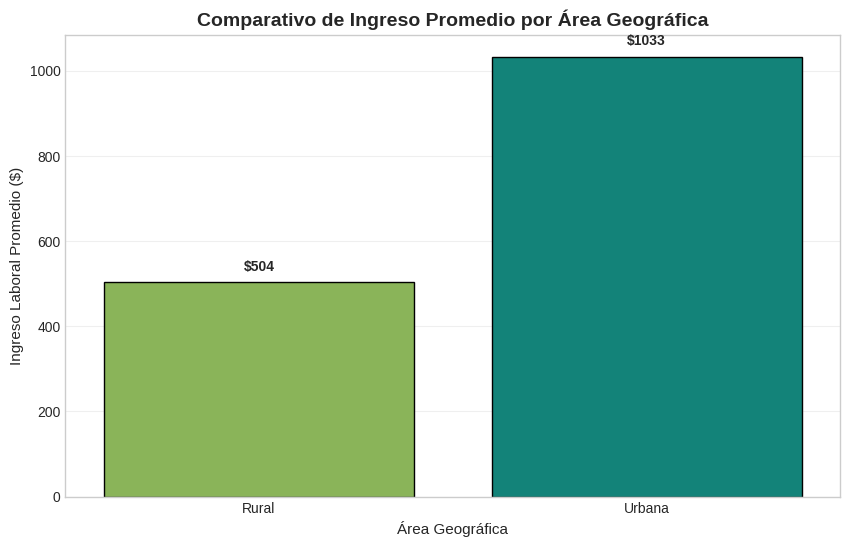

In [74]:
# ============================================
# 10E. ANÁLISIS GEOGRÁFICO: ÁREA URBANA vs RURAL
# ============================================

print("\n🌍 ANÁLISIS GEOGRÁFICO: Comparativo Urbano vs Rural")
print("-" * 60)

# Agrupamos por área y calculamos estadísticas básicas
ingresos_area = df_final.groupby('area_texto')['ingreso_laboral_clean'].agg(
    promedio='mean',
    mediana='median',
    conteo='count'
).reset_index()

# Mostramos resultados
print("\nResumen de ingresos por área:")
print(ingresos_area.round(2))

# ===============================
# GRÁFICO DE BARRAS COMPARATIVO
# ===============================
plt.figure(figsize=(10,6))
sns.barplot(
    data=ingresos_area,
    x='area_texto',
    y='promedio',
    palette={'Urbana': '#009688', 'Rural': '#8BC34A'},
    edgecolor='black'
)

plt.title('Comparativo de Ingreso Promedio por Área Geográfica', fontweight='bold')
plt.xlabel('Área Geográfica')
plt.ylabel('Ingreso Laboral Promedio ($)')
plt.grid(axis='y', alpha=0.3)

# Etiquetas en las barras
for index, row in ingresos_area.iterrows():
    plt.text(index, row['promedio'] + 20, f"${row['promedio']:.0f}",
             ha='center', va='bottom', fontweight='bold')

plt.show()



 Segmentación y Correlaciones Extendida

Matriz de correlaciones con variables laborales y sociodemográficas:
                  empleo  ingreso_laboral  horas_trabajadas  empleo_formal  \
empleo              1.00             0.01              0.48           0.25   
ingreso_laboral     0.01             1.00              0.01           0.03   
horas_trabajadas    0.48             0.01              1.00           0.41   
empleo_formal       0.25             0.03              0.41           1.00   
sexo_num            0.00             0.01              0.14           0.04   
educacion_num      -0.11             0.03              0.07           0.43   
grupo_etario_num    0.13             0.02              0.15           0.05   
area_num           -0.07             0.01              0.11           0.34   

                  sexo_num  educacion_num  grupo_etario_num  area_num  
empleo                0.00          -0.11              0.13     -0.07  
ingreso_laboral       0.01           0.03 

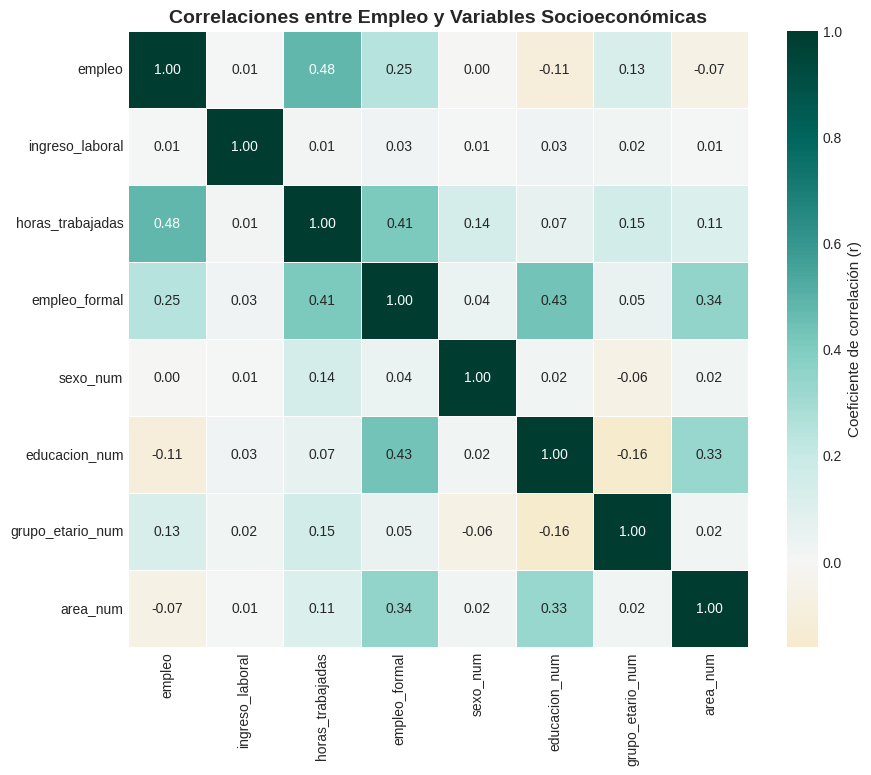


📈 Interpretación sugerida:
- Valores positivos con 'situacion_laboral_num' indican factores asociados al empleo (1=Empleado).
- Negativos indican relación con desempleo o inactividad.
- Observa la relación entre educación, seguro social y empleo formal con la probabilidad de estar empleado.


In [72]:
# ---------------------------
# 10D. SEGMENTACIÓN Y CORRELACIONES

print("\n Segmentación y Correlaciones Extendida")

# Copia del dataset
df_corr = df_final.copy()

# --- Codificación de variables categóricas ---

# Sexo: Hombre=1, Mujer=0
df_corr['sexo_num'] = df_corr['sexo_texto'].map({'Hombre': 1, 'Mujer': 0})

# Grupo etario ordinal aproximado
orden_edad = {'Joven (15-29)': 1, 'Adulto (30-54)': 2, 'Adulto Mayor (55+)': 3}
df_corr['grupo_etario_num'] = df_corr['grupo_etario'].map(orden_edad)

# Educación ordinal aproximada
orden_edu = {'Bajo': 1, 'Medio': 2, 'Alto': 3}
df_corr['educacion_num'] = df_corr['educacion_grupo'].map(orden_edu)

# Área: Urbana=1, Rural=0
df_corr['area_num'] = df_corr['area_texto'].map({'Urbana': 1, 'Rural': 0})

# --- Selección de variables relevantes ---
corr_vars = [
    'empleo',
    'ingreso_laboral',
    'horas_trabajadas',
    'empleo_formal',
    'sexo_num',
    'educacion_num',
    'grupo_etario_num',
    'area_num'
]

# --- Matriz de correlaciones ---
corr_matrix = df_corr[corr_vars].corr(method='pearson')

print("\nMatriz de correlaciones con variables laborales y sociodemográficas:")
print(corr_matrix.round(2))

# --- Visualización ampliada ---
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='BrBG', center=0, fmt='.2f',
            linewidths=0.5, cbar_kws={'label': 'Coeficiente de correlación (r)'})
plt.title('Correlaciones entre Empleo y Variables Socioeconómicas', fontweight='bold')
plt.yticks(rotation=0)
plt.show()

# --- Interpretación rápida ---
print("\n📈 Interpretación sugerida:")
print("- Valores positivos con 'situacion_laboral_num' indican factores asociados al empleo (1=Empleado).")
print("- Negativos indican relación con desempleo o inactividad.")
print("- Observa la relación entre educación, seguro social y empleo formal con la probabilidad de estar empleado.")



# Conclusiones

## ¿Los jóvenes tienen mayor desempleo que los adultos?

El análisis por grupo etario muestra que la tasa de desempleo es mayor en los jóvenes (18–29 años) en comparación con adultos y mayores.
Esto suele asociarse a menor experiencia laboral, dificultades de inserción y altas expectativas de primer empleo.
En cambio, los adultos (30–54 años) presentan mayor estabilidad y participación en empleos formales.

## ¿Existe brecha de género significativa?
Los datos muestran que no existe una brecha salarial significativa entre hombres y mujeres; sin embargo, esto no representa un logro positivo, sino más bien refleja la precarización laboral generalizada en Ecuador, donde tanto hombres como mujeres enfrentan empleos de baja estabilidad, informalidad y remuneración limitada.

A pesar de la aparente igualdad salarial, las mujeres jóvenes siguen presentando tasas de desempleo mucho más altas que los hombres, evidenciando que las oportunidades de inserción laboral siguen siendo desiguales. Este hallazgo subraya que la igualdad salarial por sí sola no garantiza equidad en el mercado laboral, y que persisten barreras estructurales que afectan principalmente a las mujeres en los primeros años de su vida laboral.

## ¿Mayor educación garantiza mejor empleo?

Contrario a lo que podría esperarse, el análisis de datos revela que a mayor nivel educativo, la tasa de desempleo tiende a aumentar. Este fenómeno sugiere que contar con una educación superior no necesariamente se traduce en una inserción laboral más efectiva dentro del mercado ecuatoriano.

Una de las principales causas identificadas es la falta de industria especializada y de oportunidades laborales acordes al nivel de formación. En muchas provincias, el mercado laboral se concentra en sectores con baja demanda de perfiles profesionales altamente calificados, lo que genera un desajuste entre la oferta educativa y la demanda del mercado de trabajo.

Además, este patrón podría reflejar que las personas con mayor nivel educativo poseen expectativas más altas respecto a salario, estabilidad o condiciones laborales, lo que prolonga el tiempo de búsqueda de empleo. En contraste, quienes poseen niveles educativos medios o bajos tienden a insertarse con mayor rapidez, aunque en empleos de menor calidad o informalidad.

## ¿Qué porcentaje del empleo es informal?

Si bien los datos muestran que la tasa de desempleo a nivel nacional es relativamente baja, apenas un poco más del 5 % del total de la población empleada, aproximadamente un 40 % de los trabajadores se desempeña en condiciones informales. Esto significa que no cuentan con seguridad social, contrato formal ni beneficios laborales.

La informalidad se concentra principalmente en zonas rurales, entre personas con bajo nivel educativo y trabajadores independientes, lo que refleja una precarización laboral significativa, incluso en contextos donde el desempleo formal parece bajo.

## Existe desempleo en el Ecuador?

Sí, aunque la tasa de desempleo formal registrada es relativamente baja, apenas un poco más del 5 % de la población económicamente activa. Esto indica que la mayoría de las personas tiene algún tipo de ocupación, pero no refleja necesariamente la calidad del empleo.

De hecho, una proporción significativa de trabajadores (aproximadamente 40 %) se encuentra en la informalidad, lo que evidencia que muchos empleos no ofrecen estabilidad ni protección social. Por lo tanto, aunque el desempleo formal no sea elevado, la precarización laboral sigue siendo un problema importante en el país.

#Recomendaciones Potenciales
Políticas de primer empleo juvenil

1. Implementar programas de incentivos a empresas que contraten jóvenes.

2. Promover pasantías y prácticas preprofesionales vinculadas a la educación técnica y universitaria.

Programas de formalización laboral

3. Facilitar procesos de registro y afiliación para trabajadores independientes y microempresas.

4. Fortalecer controles y beneficios tributarios que incentiven la formalidad.

Vinculación educación–empleo

5. Establecer alianzas entre instituciones educativas y sectores productivos.

6. Promover formación técnica adaptada a la demanda laboral local.

Reducción de brechas de género

8. Implementar políticas de igualdad salarial y conciliación laboral-familiar.

9. Promover la participación femenina en sectores tecnológicos y de alta demanda.